## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 6 : Explore data visualization techniques.

## imports

In [20]:
import pandas
import numpy
import warnings
import matplotlib.pyplot as pyplot
import seaborn
import scipy.stats
from sklearn import preprocessing
import networkx
import matplotlib_venn
import geopandas
import stemgraphic
from matplotlib_venn import venn2,venn3
import squarify
import plotly.express as express
import plotly.graph_objects as radar_graph_object

## Configurations

In [21]:
StandardScaler=preprocessing.StandardScaler(
    with_mean=False,
    with_std=True
)
Normalizer=preprocessing.Normalizer(
    norm='max'
)

In [22]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

hiding warnings

In [23]:
warnings.filterwarnings('ignore')

Initializing Functions

In [24]:
def normalDistributionGraphGenarator(
    data:numpy.array,
    *ExtraArguments
)->None:
    """Normalization graph plotter function

    Args:
        data (numpy.array): Any Array or DataFrame Column
    """
    pyplot.figure('Normal Distribution Graph')
    data=numpy.sort(data)
    pyplot.plot(data, scipy.stats.norm.pdf(
        data, 
        numpy.mean(data),
        numpy.std(data))
    )
    for data in ExtraArguments:
        data=numpy.sort(data)
        pyplot.plot(data, 
            scipy.stats.norm.pdf(
            data, 
            numpy.mean(data),
            numpy.std(data))
    )
    pyplot.xlabel('values')
    pyplot.ylabel("Normalized Values")

In [25]:
def generateClusters(data:pandas.DataFrame,column_name:str,number_of_clusters=5)->list:
    """ Function for getting clusters using Kmeans Method
        Only Numerical Column is allowed

    Args:
        data (pandas.DataFrame): DataFrame Copy
        column_name (str): Specific Column Name
        number_of_clusters (int, optional): number of required clusters . Defaults to 5.

    Returns:
        list: list of DataFrames
    """
    Samples=[]
    column_data=data[column_name]
    cluster_centers,_=kmeans(
        column_data.to_numpy(),
        k_or_guess=number_of_clusters
    )
    cluster_indexes,_ = vq(
        column_data.to_numpy(),
        cluster_centers
    )
    data["cluster_value"]=cluster_indexes
    for i in range(number_of_clusters):
        Samples.append(
            data[data["cluster_value"]==i].sort_values(by=column_name,
                                                       ascending=False
    ).reset_index(
                drop=True
    ).drop(
        ['cluster_value'],axis=1)
    )
    data=data.drop(['cluster_value'],axis=1)
    return Samples

reading dataset

In [26]:
Raw_Data=pandas.read_csv("./Data/Raw_Data/owid-covid-data.csv",date_parser='date')

Sorting the Dataframe using total_cases column

selecting specific columns

In [27]:
Raw_Data=Raw_Data.sort_values(
    by="total_cases",
    ascending=False
).reset_index(drop=True)

In [28]:
Selected_Columns=['iso_code','date', 'continent', 'location', 'total_cases','new_cases', 'total_deaths', 'new_deaths','population','life_expectancy']

Location Specific Data

In [29]:
location="India"

In [30]:
Location_Specific_Data=Raw_Data[
    Raw_Data['location']==location
]

Recently Updated Data

In [31]:
recent_date=Raw_Data['date'][0]
Recent_Data=Raw_Data[Raw_Data['date']==recent_date]

In [32]:
def PreprocessTheCovidData(Main_Data:pandas.DataFrame,Selected_columns:list,isCumulative=False)->pandas.DataFrame:
    """Final Function for Whole Data Processing for Covid Data

    Args:
        Main_Data (pandas.DataFrame): Initial Raw Data
        Selected_columns (list): list of columns that to bet selected

    Returns:
        pandas.DataFrame: Preprocessed Data
    """
    Main_Data=Main_Data[Selected_Columns]
    if isCumulative:
        for index in Main_Data['location'].value_counts().index:
            if len(Main_Data[Main_Data['location']==index]['total_cases'].unique())<2:
                Main_Data=Main_Data[Main_Data['location']!=index]
    for index in Main_Data[Main_Data['continent'].isnull()==True]['location'].value_counts().index:
        if index.find("income")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Income Based"})
        elif index.find("Europe")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"Europe"})
        elif index.find("International")!=-1 or index.find("World")!=-1:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":"World"})
        else:
            Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(value={"continent":index})
    for index in Main_Data[Main_Data['life_expectancy'].isnull()==False]['continent'].value_counts().index:
        Main_Data[Main_Data['continent']==index]=Main_Data[Main_Data['continent']==index].fillna(value={"life_expectancy":Main_Data[Main_Data['continent']==index]['life_expectancy'].mean()})
    Main_Data=Main_Data.fillna(value={"life_expectancy":Main_Data['life_expectancy'].mean()})
    Main_Data['population']=Main_Data['population'].fillna(Main_Data[Main_Data['location']=='International']['total_cases'].max())
    Main_Data[['new_cases','new_deaths']]=Main_Data[['new_cases','new_deaths']].fillna(0)
    for index in Main_Data['location'].value_counts().index:
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(0,limit=1)
        Main_Data[Main_Data['location']==index]=Main_Data[Main_Data['location']==index].fillna(method='ffill')
    return Main_Data

# Data Exploration

## Raw Data

printing Checking of Raw dataset

In [33]:
Raw_Data

iso_code continent  location        date  total_cases  new_cases  \
0       OWID_WRL       NaN     World  2023-03-21  761071062.0    33950.0   
1       OWID_WRL       NaN     World  2023-03-20  761037112.0    54418.0   
2       OWID_WRL       NaN     World  2023-03-19  760982694.0    80448.0   
3       OWID_WRL       NaN     World  2023-03-18  760902246.0   216329.0   
4       OWID_WRL       NaN     World  2023-03-17  760685917.0    76049.0   
...          ...       ...       ...         ...          ...        ...   
297147       ZWE    Africa  Zimbabwe  2020-03-16          NaN        0.0   
297148       ZWE    Africa  Zimbabwe  2020-03-17          NaN        0.0   
297149       ZWE    Africa  Zimbabwe  2020-03-18          NaN        0.0   
297150       ZWE    Africa  Zimbabwe  2020-03-19          NaN        0.0   
297151       ZWE    Africa  Zimbabwe  2020-03-20          NaN        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                93977.286     6879664.0       198.0              619.714   
1               101009.857     6879466.0       256.0              668.857   
2               104900.286     6879210.0       325.0              699.571   
3               117118.286     6878885.0      2478.0              781.286   
4               124941.857     6876407.0       294.0              799.571   
...                    ...           ...         ...                  ...   
297147               0.000           5.0         0.0                0.000   
297148               0.000           5.0         0.0                0.000   
297149               0.000           5.0         0.0                0.000   
297150               0.000           5.0         0.0                0.000   
297151               0.000           5.0         0.0                0.000   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...        34.635                  60.130                       2.705   
1       ...        34.635                  60.130                       2.705   
2       ...        34.635                  60.130                       2.705   
3       ...        34.635                  60.130                       2.705   
4       ...        34.635                  60.130                       2.705   
...     ...           ...                     ...                         ...   
297147  ...        30.700                  36.791                       1.700   
297148  ...        30.700                  36.791                       1.700   
297149  ...        30.700                  36.791                       1.700   
297150  ...        30.700                  36.791                       1.700   
297151  ...        30.700                  36.791                       1.700   

        life_expectancy  human_development_index    population  \
0                 72.58                    0.737  7.975105e+09   
1                 72.58                    0.737  7.975105e+09   
2                 72.58                    0.737  7.975105e+09   
3                 72.58                    0.737  7.975105e+09   
4                 72.58                    0.737  7.975105e+09   
...                 ...                      ...           ...   
297147            61.49                    0.571  1.632054e+07   
297148            61.49                    0.571  1.632054e+07   
297149            61.49                    0.571  1.632054e+07   
297150            61.49                    0.571  1.632054e+07   
297151            61.49                    0.571  1.632054e+07   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                  

## Location Specific Data

Printing Location Specific Data

In [34]:
Location_Specific_Data

iso_code continent location        date  total_cases  new_cases  \
6470        IND      Asia    India  2023-03-21   44696984.0      646.0   
6471        IND      Asia    India  2023-03-20   44696338.0      918.0   
6472        IND      Asia    India  2023-03-19   44695420.0     1071.0   
6473        IND      Asia    India  2023-03-18   44694349.0      843.0   
6474        IND      Asia    India  2023-03-17   44693506.0      796.0   
...         ...       ...      ...         ...          ...        ...   
271112      IND      Asia    India  2023-03-22          NaN        NaN   
271113      IND      Asia    India  2023-03-23          NaN        NaN   
271114      IND      Asia    India  2023-03-24          NaN        NaN   
271115      IND      Asia    India  2023-03-25          NaN        NaN   
271116      IND      Asia    India  2023-03-26          NaN        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
6470               806.571      530808.0         2.0                3.429   
6471               771.714      530806.0         4.0                3.429   
6472               704.000      530802.0         3.0                3.000   
6473               625.857      530799.0         4.0                2.714   
6474               570.571      530795.0         5.0                2.286   
...                    ...           ...         ...                  ...   
271112                 NaN           NaN         NaN                  NaN   
271113                 NaN           NaN         NaN                  NaN   
271114                 NaN           NaN         NaN                  NaN   
271115                 NaN           NaN         NaN                  NaN   
271116                 NaN           NaN         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
6470    ...          20.6                   59.55                        0.53   
6471    ...          20.6                   59.55                        0.53   
6472    ...          20.6                   59.55                        0.53   
6473    ...          20.6                   59.55                        0.53   
6474    ...          20.6                   59.55                        0.53   
...     ...           ...                     ...                         ...   
271112  ...          20.6                   59.55                        0.53   
271113  ...          20.6                   59.55                        0.53   
271114  ...          20.6                   59.55                        0.53   
271115  ...          20.6                   59.55                        0.53   
271116  ...          20.6                   59.55                        0.53   

        life_expectancy  human_development_index    population  \
6470              69.66                    0.645  1.417173e+09   
6471              69.66                    0.645  1.417173e+09   
6472              69.66                    0.645  1.417173e+09   
6473              69.66                    0.645  1.417173e+09   
6474              69.66                    0.645  1.417173e+09   
...                 ...                      ...           ...   
271112            69.66                    0.645  1.417173e+09   
271113            69.66                    0.645  1.417173e+09   
271114            69.66                    0.645  1.417173e+09   
271115            69.66                    0.645  1.417173e+09   
271116            69.66                    0.645  1.417173e+09   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
6470                                     NaN                          NaN   
6471                                     NaN                          NaN   
6472                                     NaN                          NaN   
6473                                     NaN                          NaN   
6474                                     N

## Recently Updated Data

Printing Recently Updated Data

In [35]:
Recent_Data

iso_code continent             location        date  total_cases  \
0       OWID_WRL       NaN                World  2023-03-21  761071062.0   
398     OWID_HIC       NaN          High income  2023-03-21  417910867.0   
763     OWID_ASI       NaN                 Asia  2023-03-21  295265312.0   
967     OWID_EUR       NaN               Europe  2023-03-21  247480240.0   
1068    OWID_UMC       NaN  Upper middle income  2023-03-21  242747582.0   
...          ...       ...                  ...         ...          ...   
274299       MAC      Asia                Macao  2023-03-21          NaN   
280051       PRK      Asia          North Korea  2023-03-21          NaN   
281912  OWID_NIR    Europe     Northern Ireland  2023-03-21          NaN   
290200       TWN      Asia               Taiwan  2023-03-21          NaN   
293659       TKM      Asia         Turkmenistan  2023-03-21          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0         33950.0           93977.286     6879664.0       198.0   
398       20591.0           67340.143     2837386.0       126.0   
763        3593.0           25724.714     1626572.0        27.0   
967       27553.0           39705.143     2029529.0       154.0   
1068      11000.0           24040.714     2651676.0        45.0   
...           ...                 ...           ...         ...   
274299        NaN                 NaN           NaN         NaN   
280051        0.0               0.000           NaN         0.0   
281912        NaN                 NaN           NaN         NaN   
290200        NaN                 NaN           NaN         NaN   
293659        0.0               0.000           NaN         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
0                   619.714  ...        34.635                   60.13   
398                 487.429  ...           NaN                     NaN   
763                 118.286  ...           NaN                     NaN   
967                 188.286  ...           NaN                     NaN   
1068                 98.429  ...           NaN                     NaN   
...                     ...  ...           ...                     ...   
274299                  NaN  ...           NaN                     NaN   
280051                0.000  ...           NaN                     NaN   
281912                  NaN  ...           NaN                     NaN   
290200                  NaN  ...           NaN                     NaN   
293659                0.000  ...           NaN                  100.00   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                            2.705            72.58                    0.737   
398                            NaN              NaN                      NaN   
763                            NaN              NaN                      NaN   
967                            NaN              NaN                      NaN   
1068                           NaN              NaN                      NaN   
...                            ...              ...                      ...   
274299                         NaN            84.24                      NaN   
280051                      13.200            72.27                      NaN   
281912                         NaN              NaN                      NaN   
290200                         NaN            80.46                      NaN   
293659                       7.400            68.19                    0.715   

          population  excess_mortality_cumulative_absolute  \
0       7.975105e+09                                   NaN   
398     1.250515e+09                                   NaN   
763     4.721383e+09                                   NaN   
967     7.448078e+08                                   NaN   
1068    2.525921e+09                                   NaN   
...              ...                                   ...   
274299

# Data Preprocessing

In [36]:
Main_Data=PreprocessTheCovidData(
    Location_Specific_Data.copy().sort_values(by='date',ascending=True).reset_index(drop=True),
    Selected_Columns
)

In [37]:
Main_Data

iso_code        date continent location  total_cases  new_cases  \
0         IND  2020-01-03      Asia    India          0.0        0.0   
1         IND  2020-01-04      Asia    India          0.0        0.0   
2         IND  2020-01-05      Asia    India          0.0        0.0   
3         IND  2020-01-06      Asia    India          0.0        0.0   
4         IND  2020-01-07      Asia    India          0.0        0.0   
...       ...         ...       ...      ...          ...        ...   
1174      IND  2023-03-22      Asia    India   44696984.0        0.0   
1175      IND  2023-03-23      Asia    India   44696984.0        0.0   
1176      IND  2023-03-24      Asia    India   44696984.0        0.0   
1177      IND  2023-03-25      Asia    India   44696984.0        0.0   
1178      IND  2023-03-26      Asia    India   44696984.0        0.0   

      total_deaths  new_deaths    population  life_expectancy  
0              0.0         0.0  1.417173e+09            69.66  
1              0.0         0.0  1.417173e+09            69.66  
2              0.0         0.0  1.417173e+09            69.66  
3              0.0         0.0  1.417173e+09            69.66  
4              0.0         0.0  1.417173e+09            69.66  
...            ...         ...           ...              ...  
1174      530808.0         0.0  1.417173e+09            69.66  
1175      530808.0         0.0  1.417173e+09            69.66  
1176      530808.0         0.0  1.417173e+09            69.66  
1177      530808.0         0.0  1.417173e+09            69.66  
1178      530808.0         0.0  1.417173e+09            69.66  

[1179 rows x 10 columns]

# Data Visualization

## Basic and Most used Graphs

### Normal Distribution Graphs Ploting

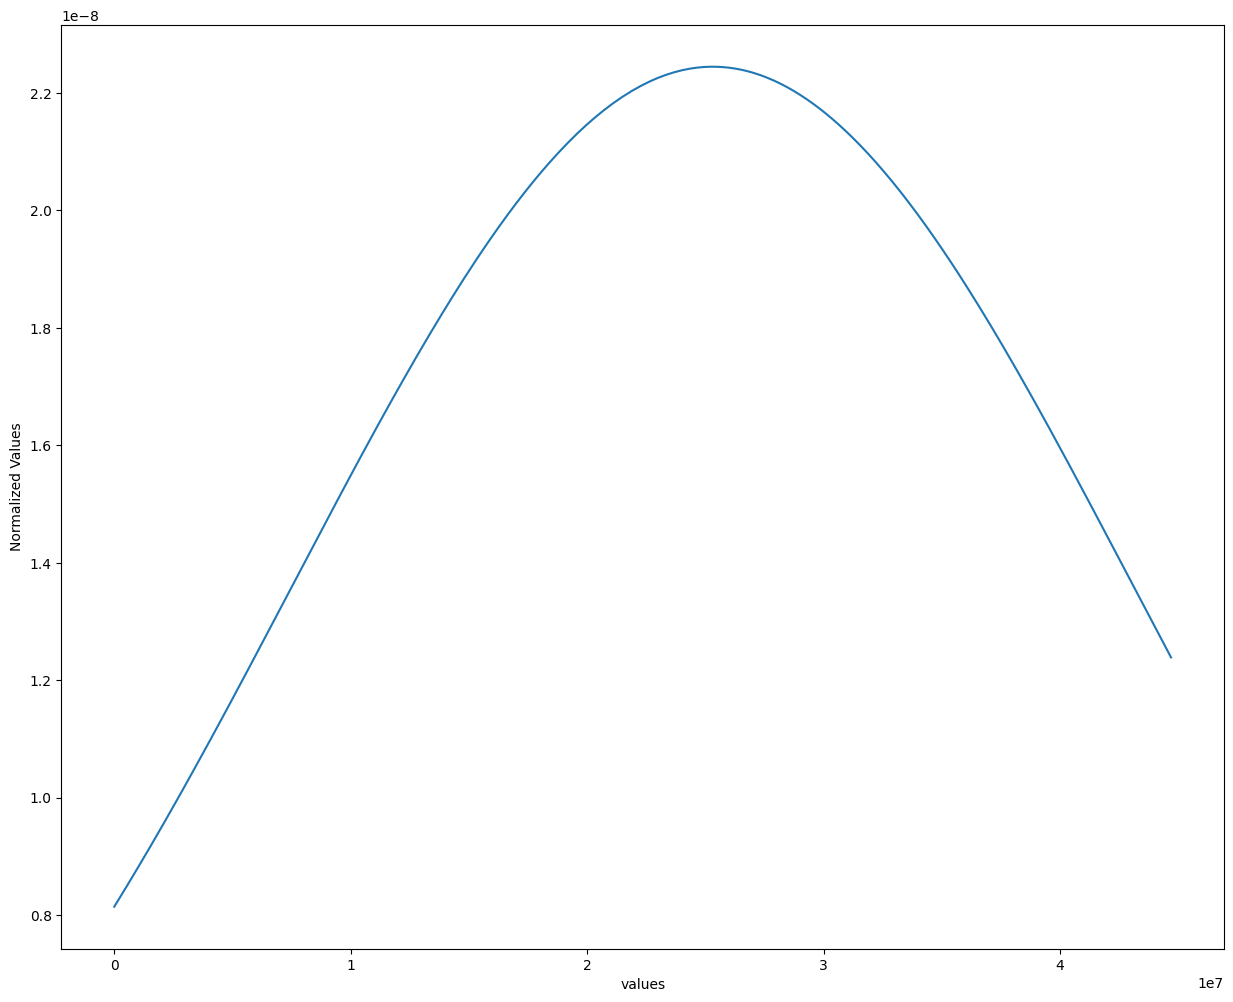

In [38]:
normalDistributionGraphGenarator(Main_Data['total_cases'])

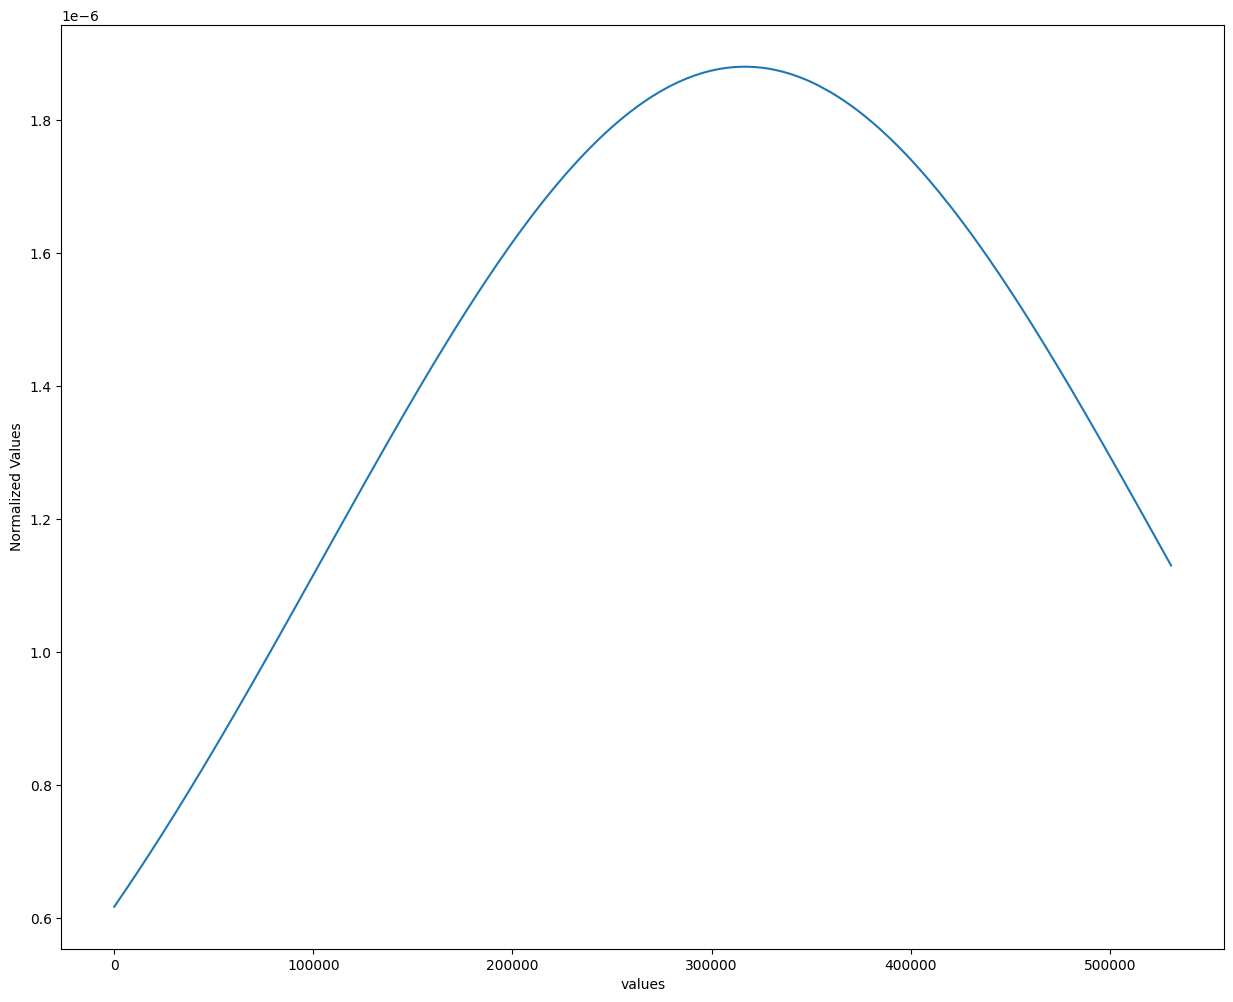

In [39]:
normalDistributionGraphGenarator(Main_Data['total_deaths'])

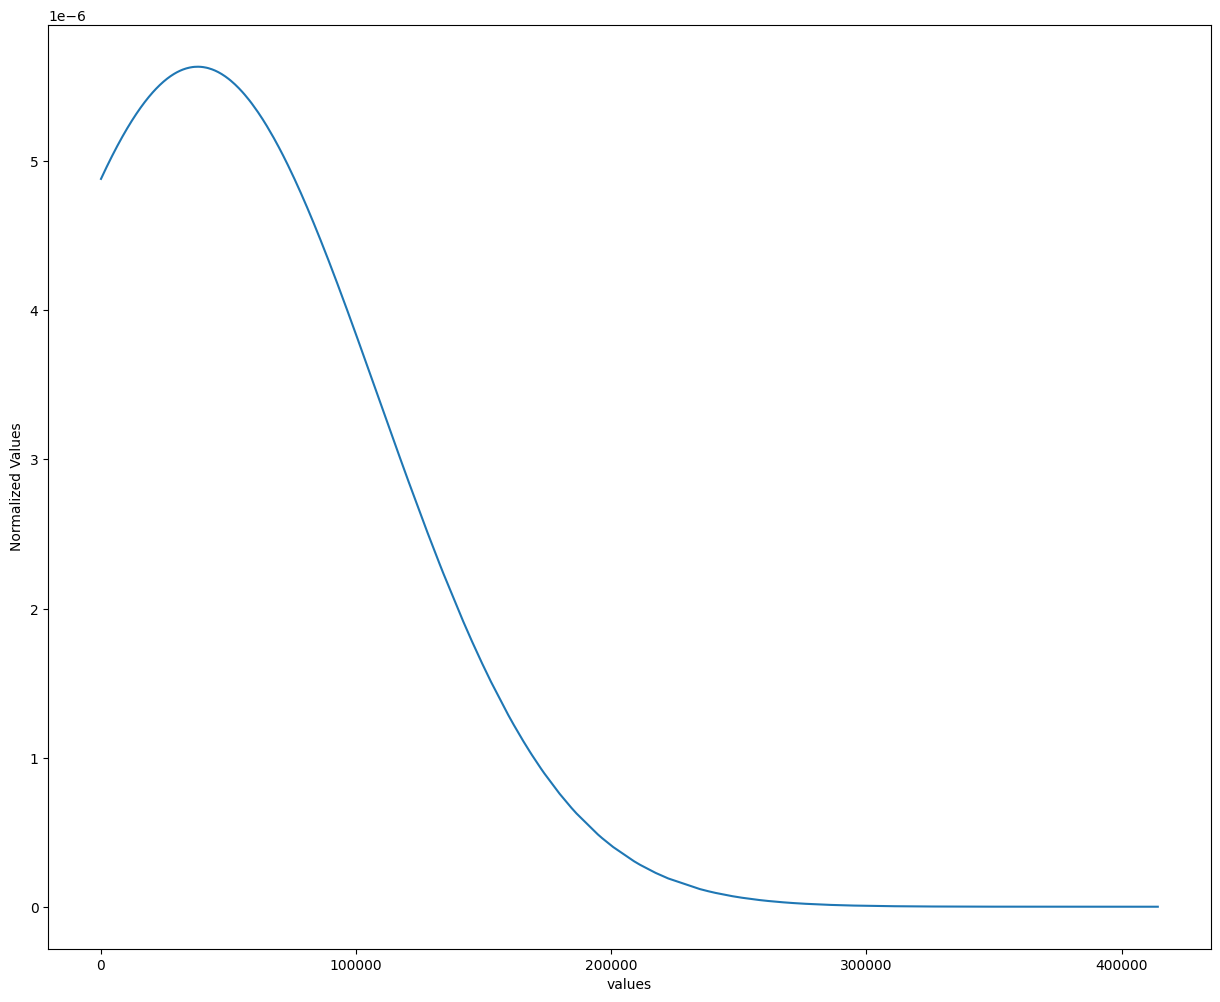

In [40]:
normalDistributionGraphGenarator(Main_Data['new_cases'])

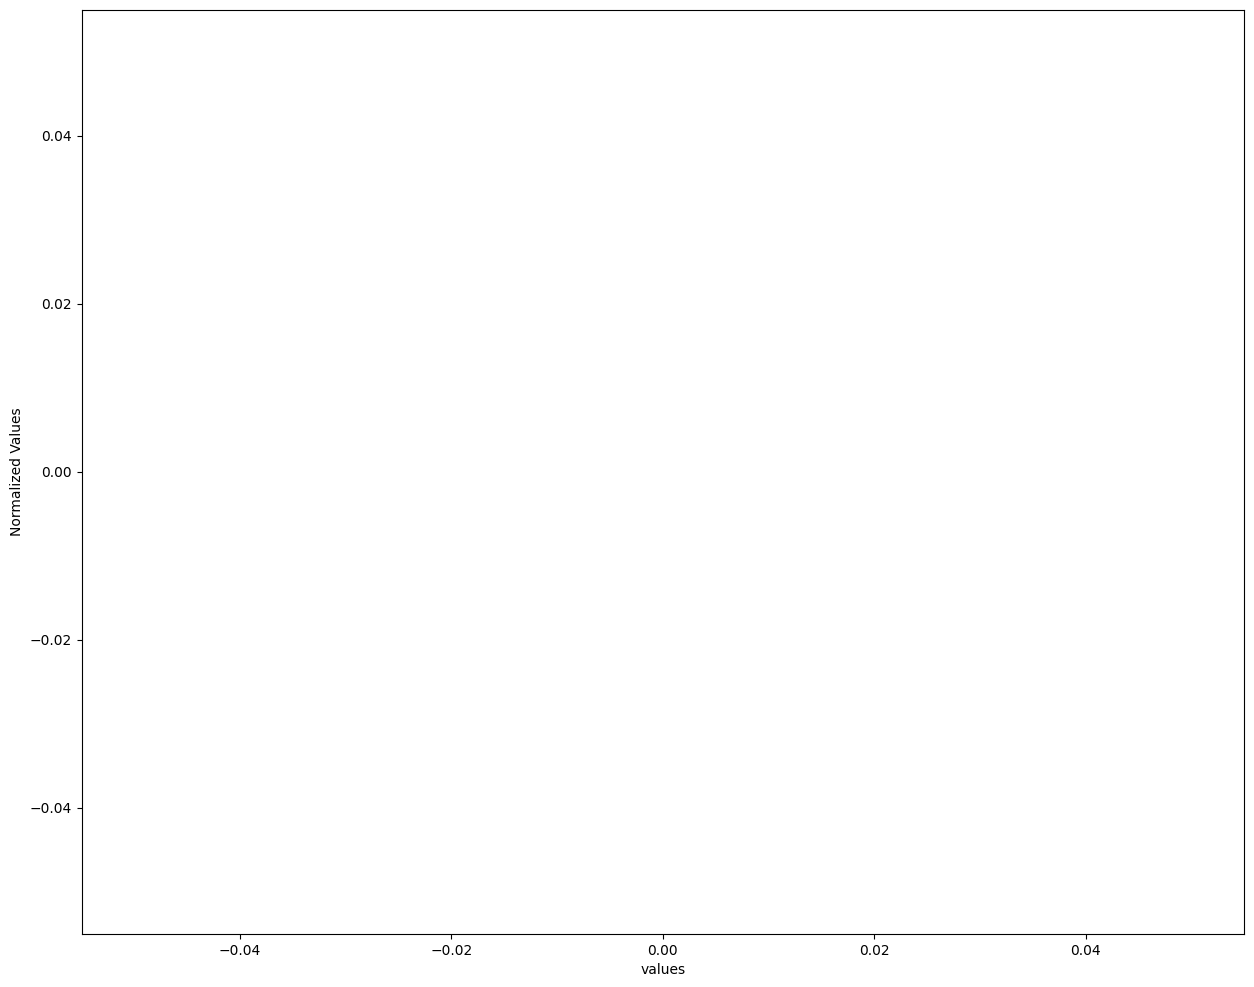

In [41]:
normalDistributionGraphGenarator(Main_Data['population'])

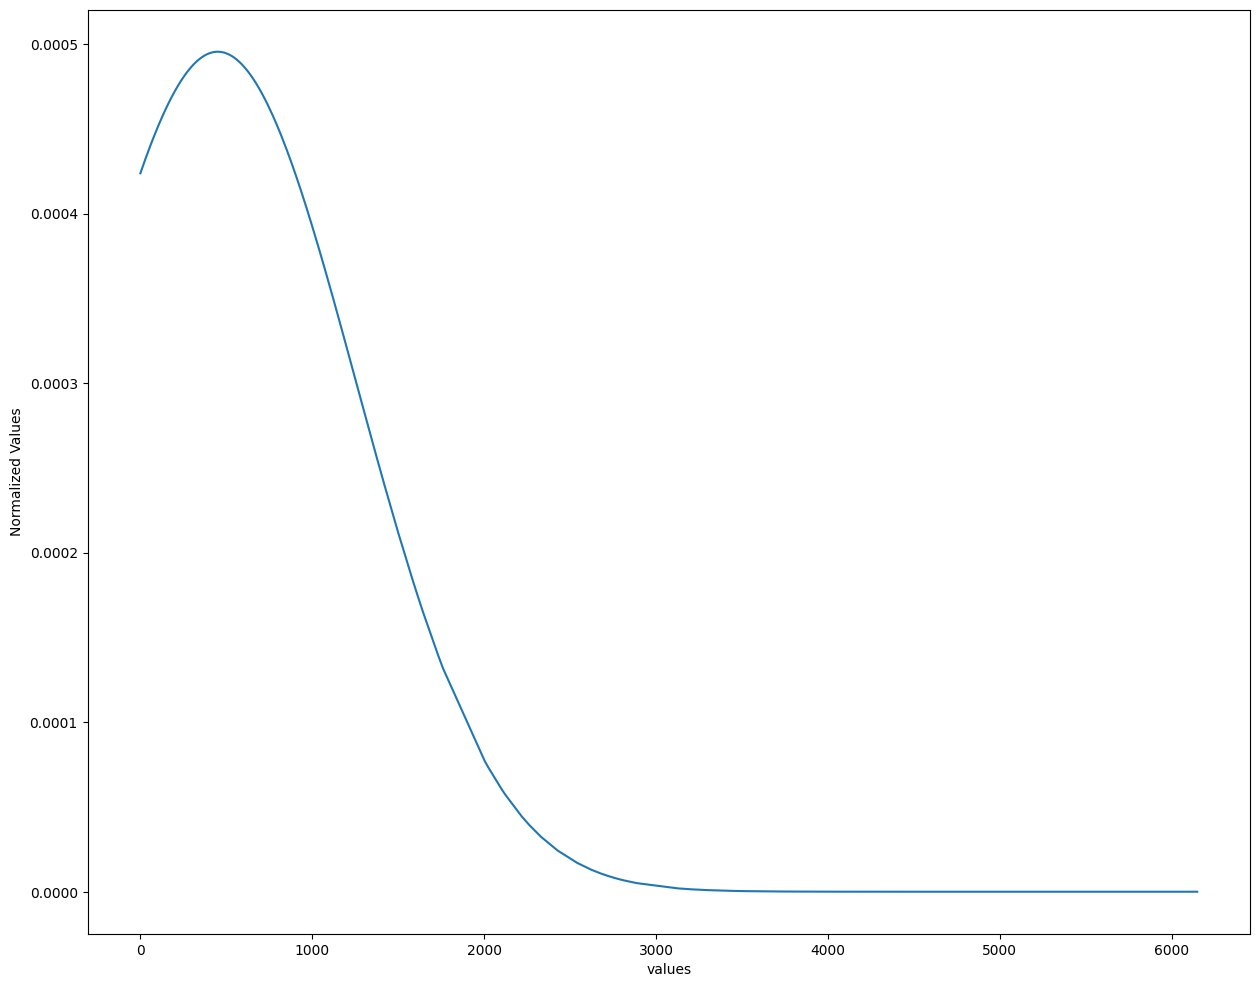

In [42]:
normalDistributionGraphGenarator(Main_Data['new_deaths'])

### Line Graphs

<AxesSubplot: xlabel='date'>

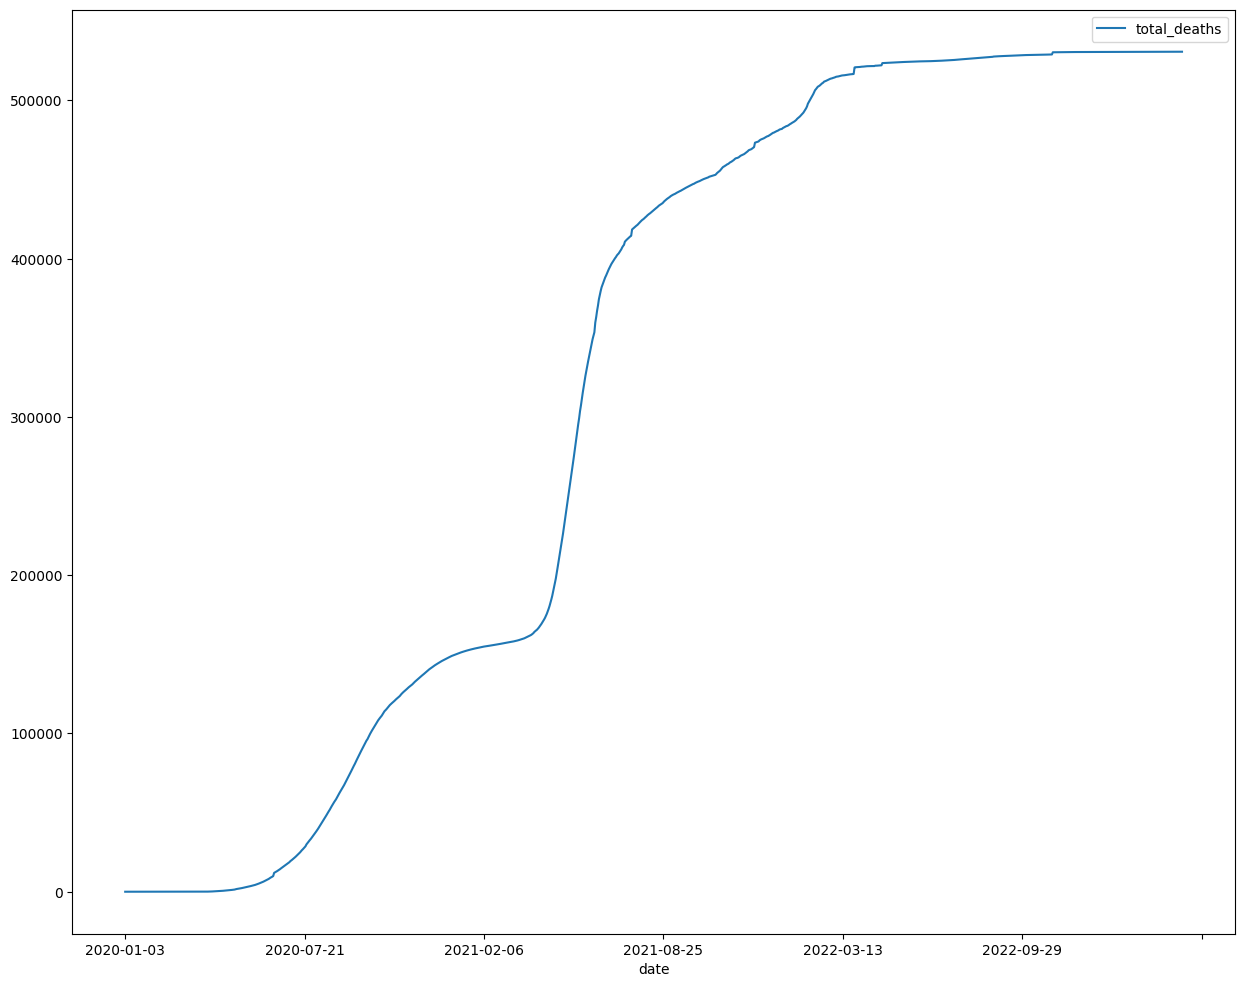

In [45]:
Main_Data.plot(x='date', y='total_deaths')

<AxesSubplot: xlabel='date'>

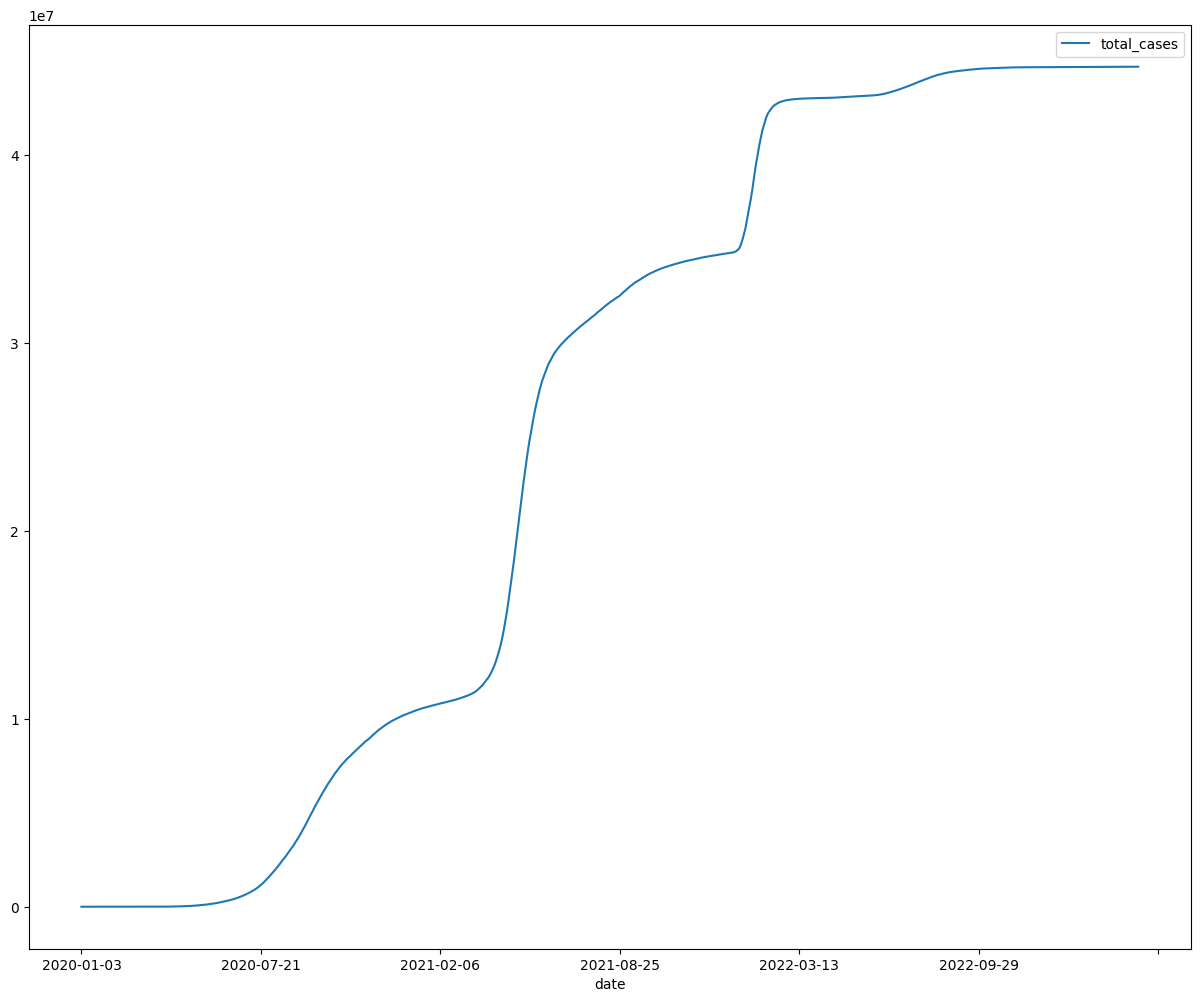

In [44]:
Main_Data.plot(x='date', y='total_cases')

<AxesSubplot: xlabel='date'>

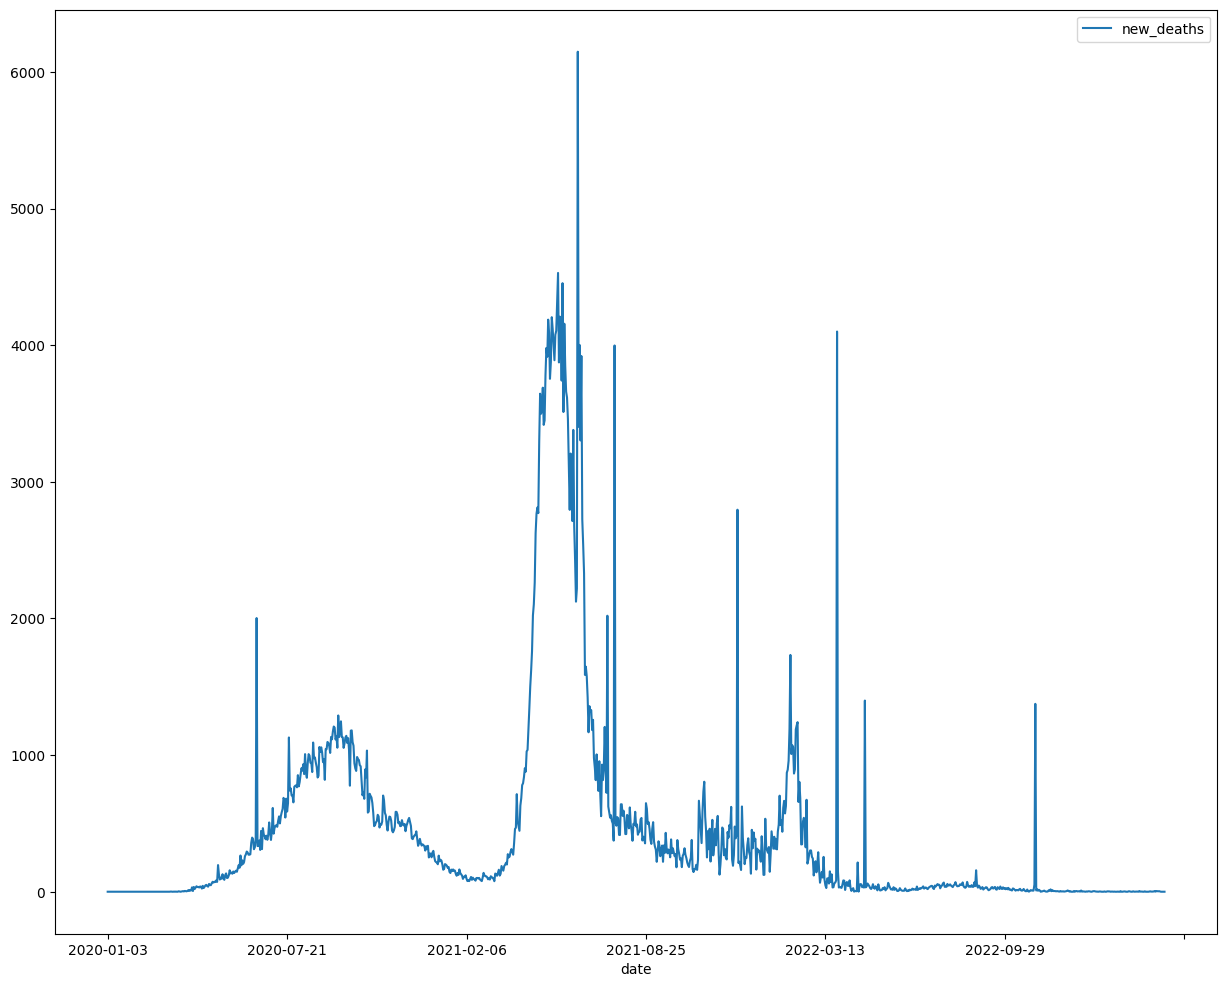

In [47]:
Main_Data.plot(x='date', y='new_deaths')

<AxesSubplot: xlabel='date'>

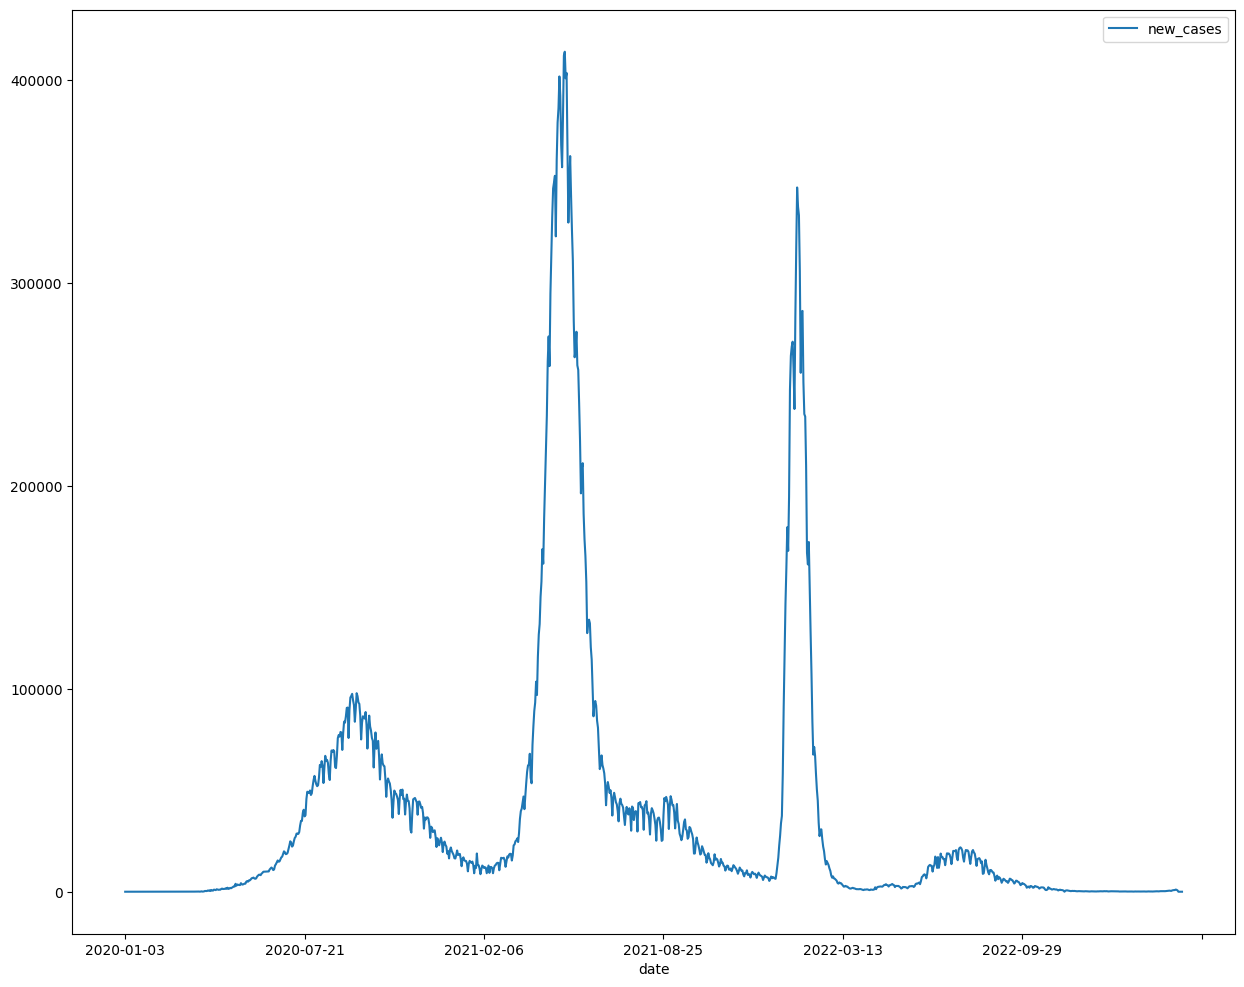

In [46]:
Main_Data.plot(x='date', y='new_cases')

<AxesSubplot: xlabel='date'>

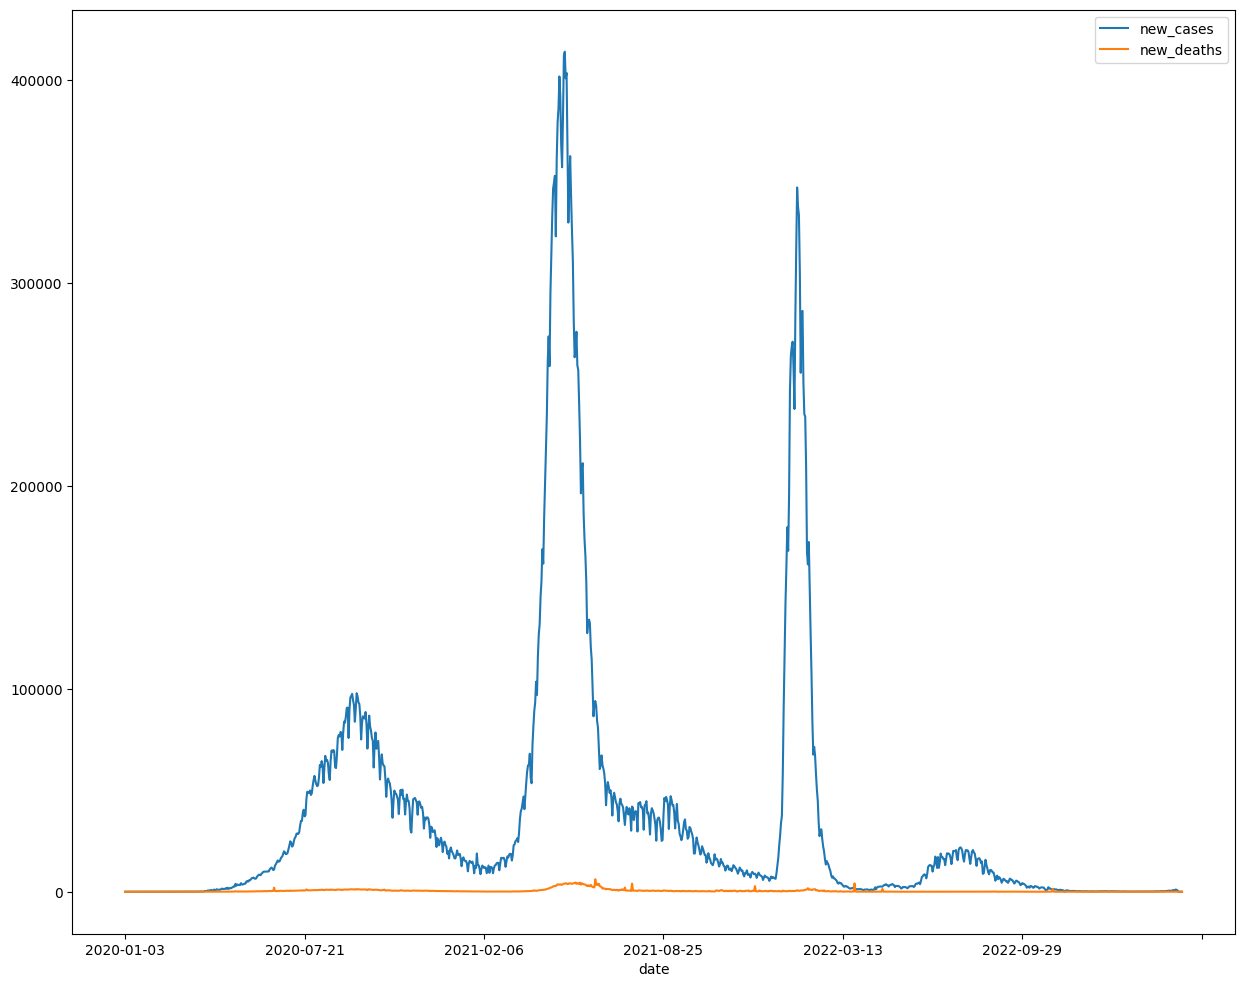

In [48]:
Main_Data.plot(x='date', y=['new_cases','new_deaths'])

### Pie Charts

([<matplotlib.patches.Wedge at 0x145468db130>],
 [Text(-1.1, 1.3471114790620887e-16, 'India')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

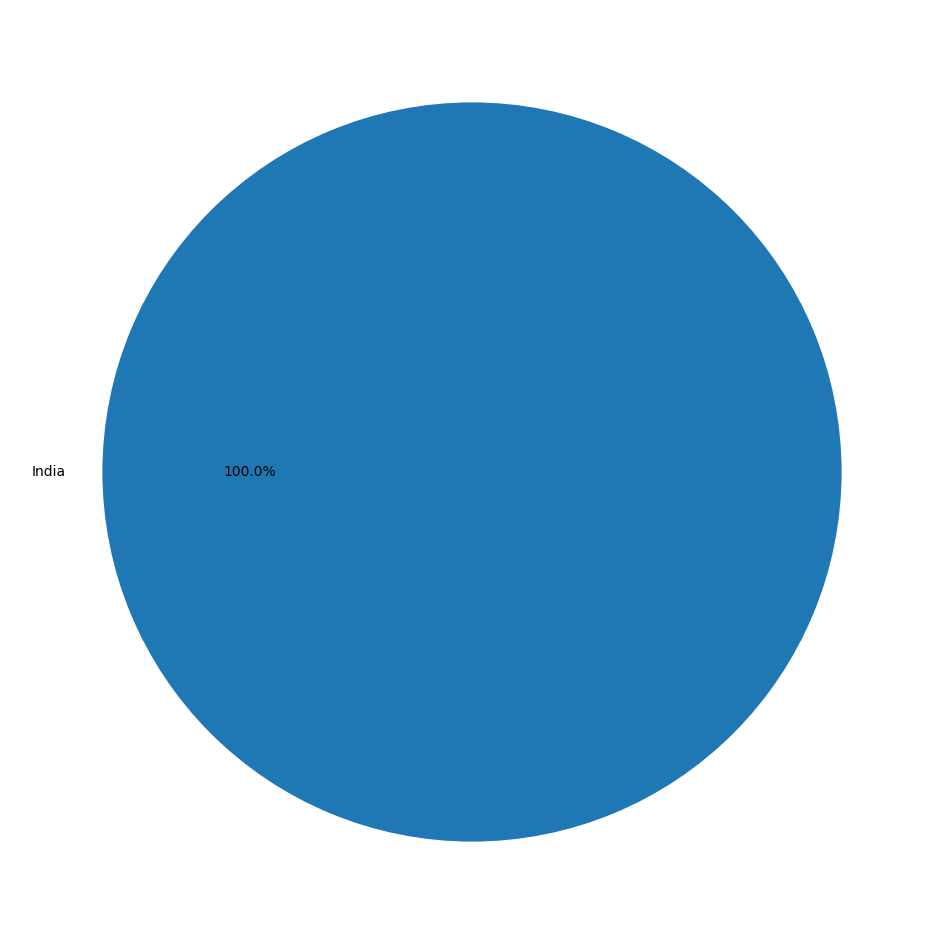

In [53]:
pyplot.pie(Main_Data[['population','location']].groupby("location").sum()['population'],labels=Main_Data[['population','location']].groupby("location").sum().index,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1454684abf0>],
 [Text(-1.1, 1.3471114790620887e-16, 'Asia')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

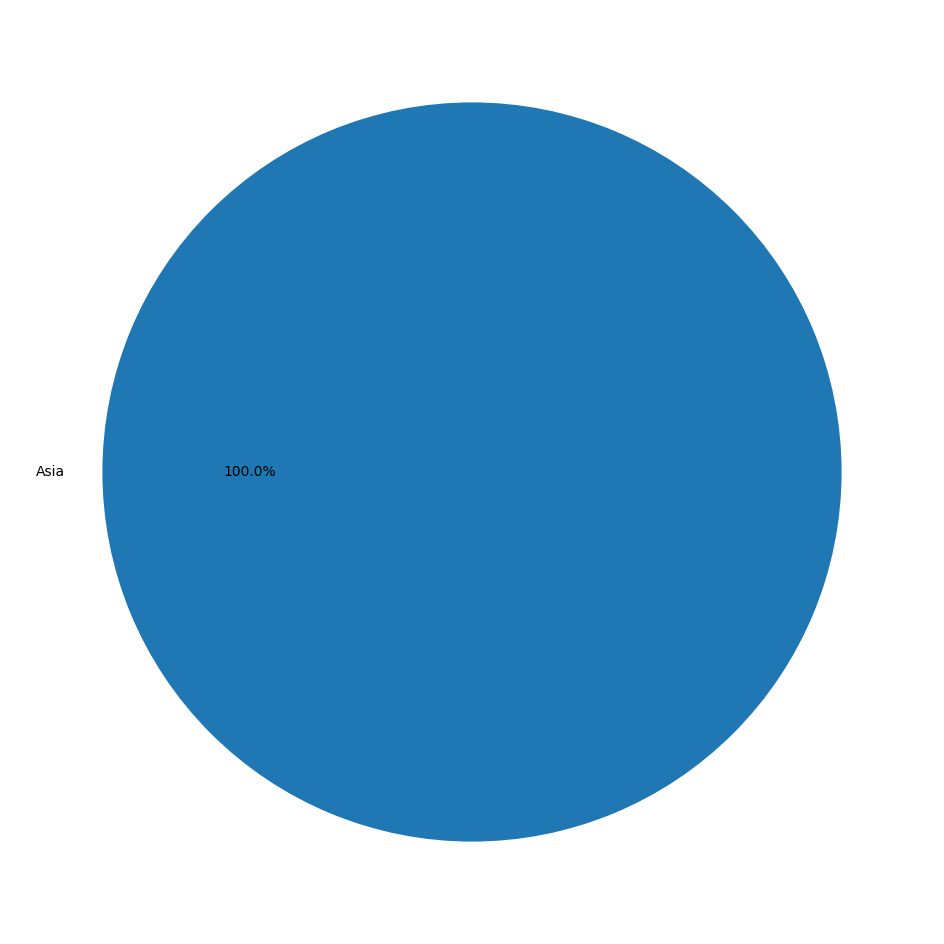

In [54]:
pyplot.pie(Main_Data[['total_cases','continent']].groupby("continent").sum()['total_cases'],labels=Main_Data[['total_cases','continent']].groupby("continent").sum().index,autopct='%1.1f%%')


### Box Plot

<AxesSubplot: >

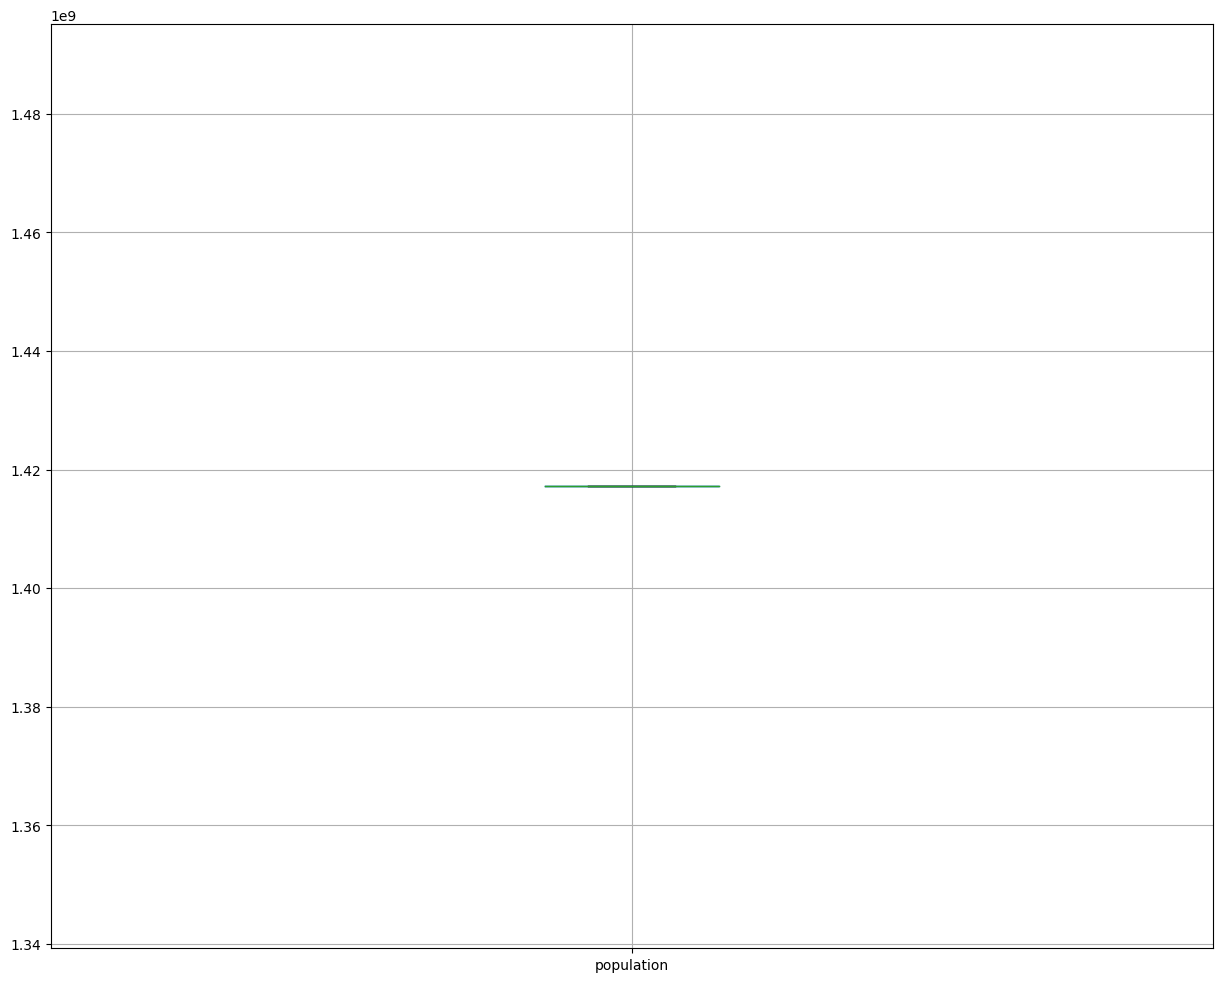

In [52]:
Main_Data.boxplot('population')

<AxesSubplot: >

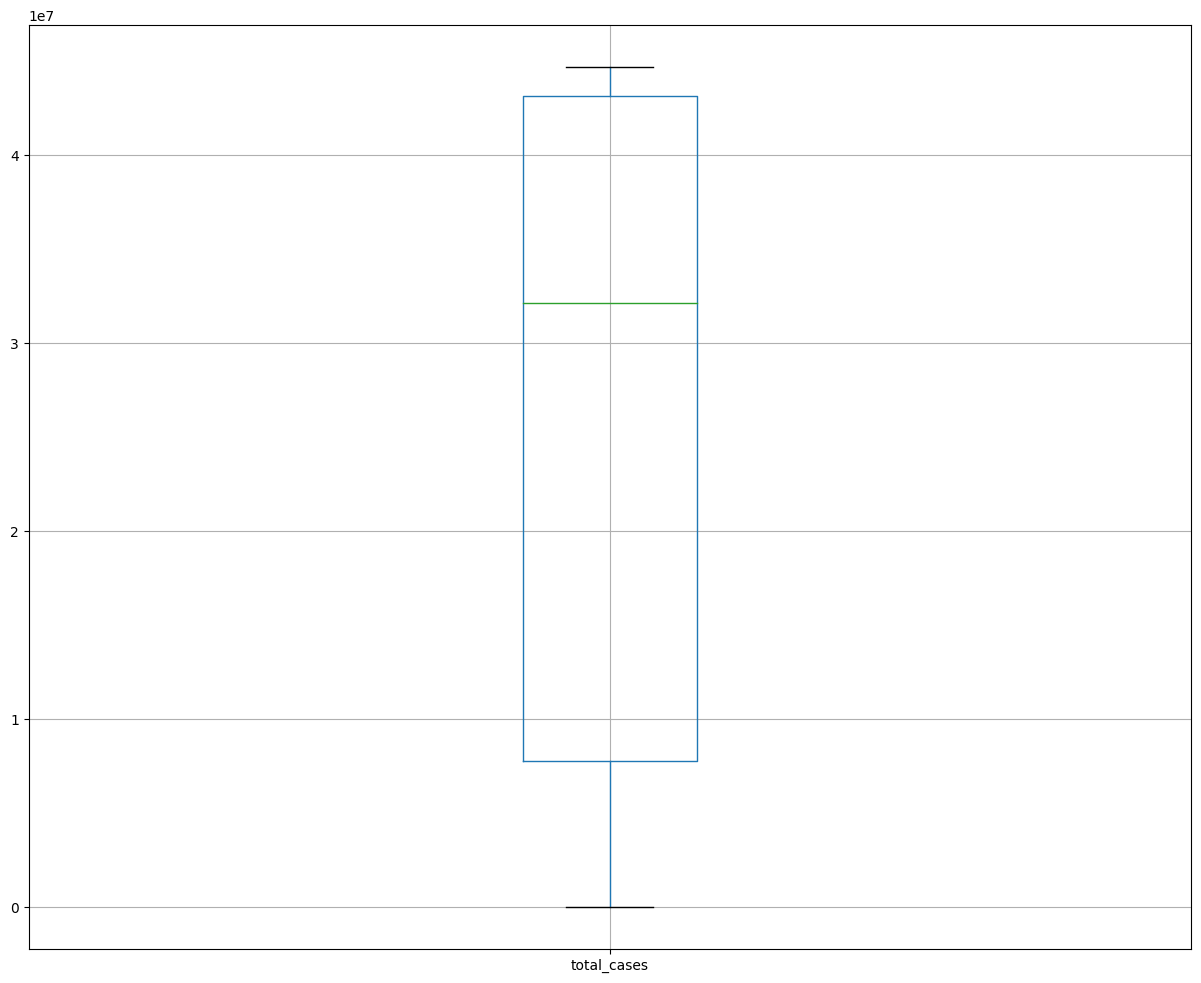

In [53]:
Main_Data.boxplot('total_cases')

<AxesSubplot: >

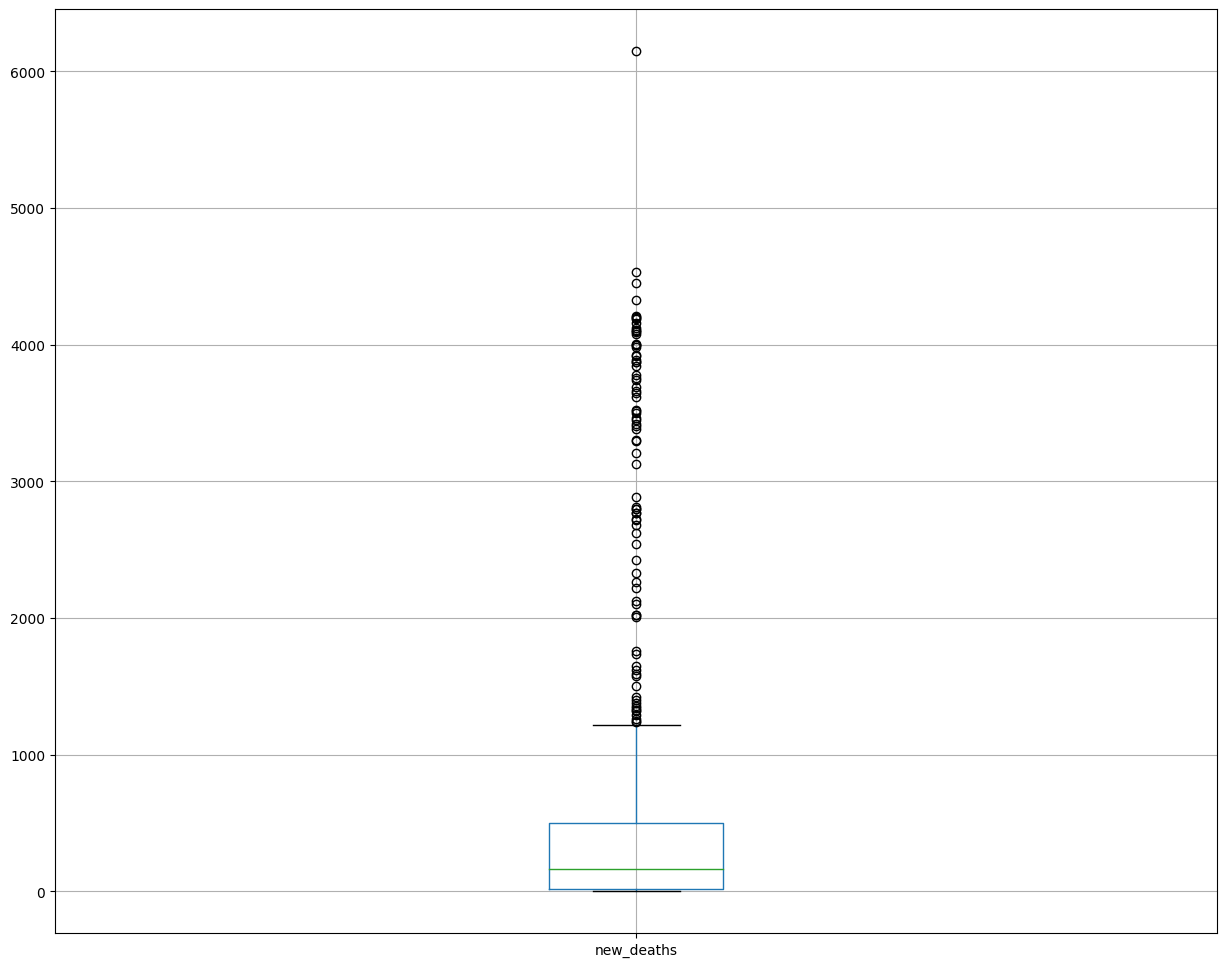

In [54]:
Main_Data.boxplot('new_deaths')

<AxesSubplot: >

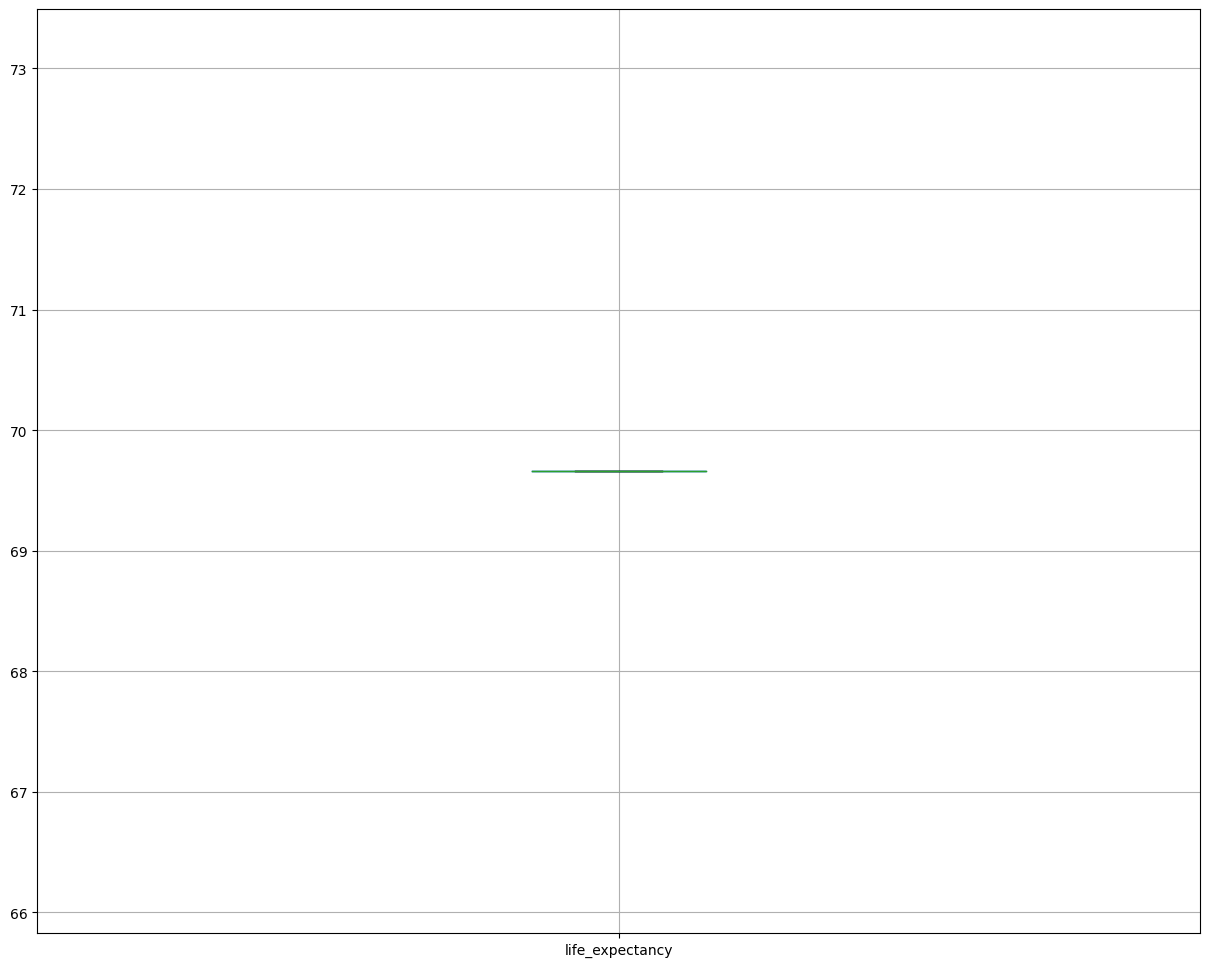

In [57]:
Main_Data.boxplot('life_expectancy')

<AxesSubplot: >

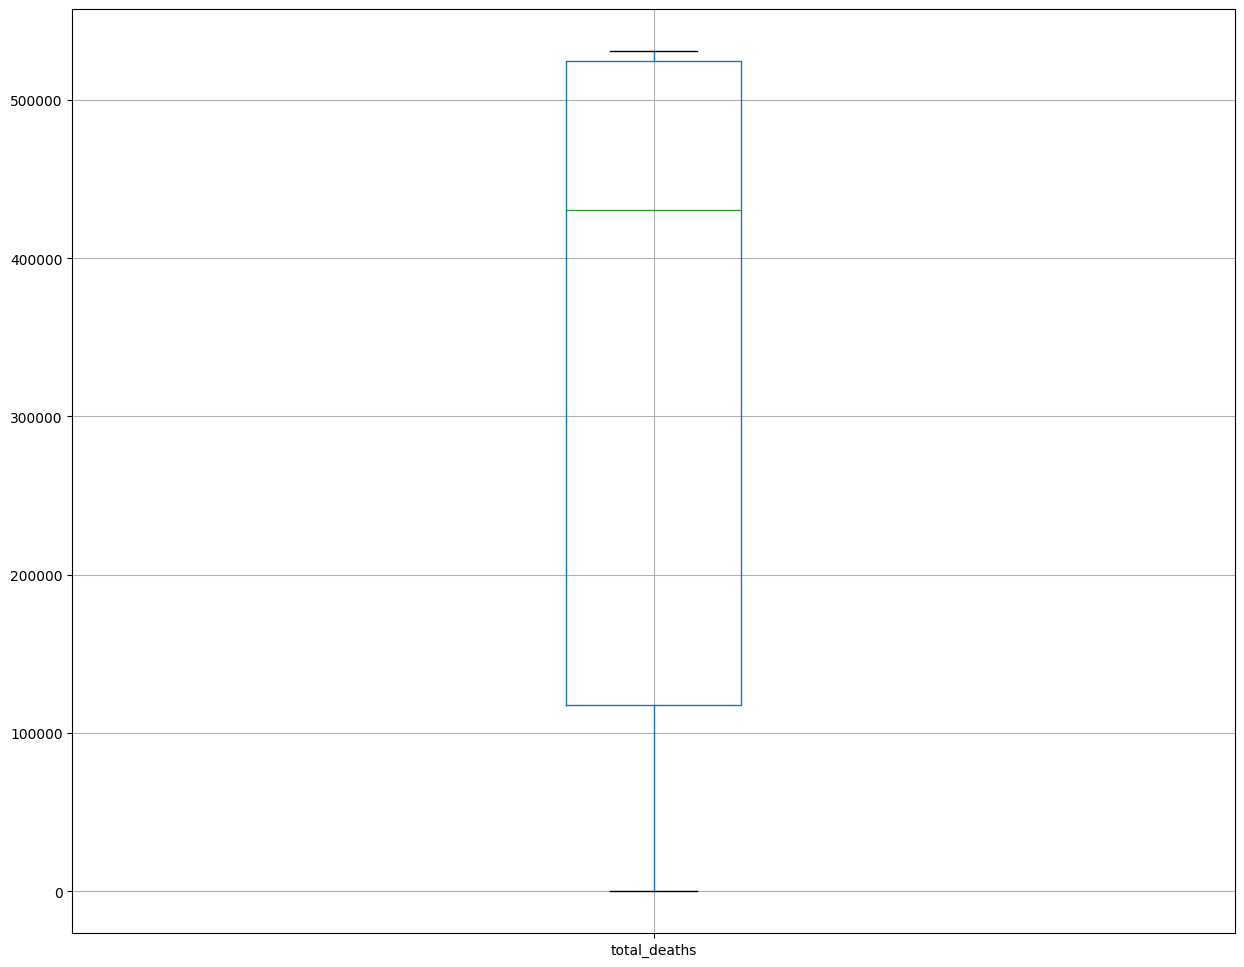

In [55]:
Main_Data.boxplot('total_deaths')

<AxesSubplot: >

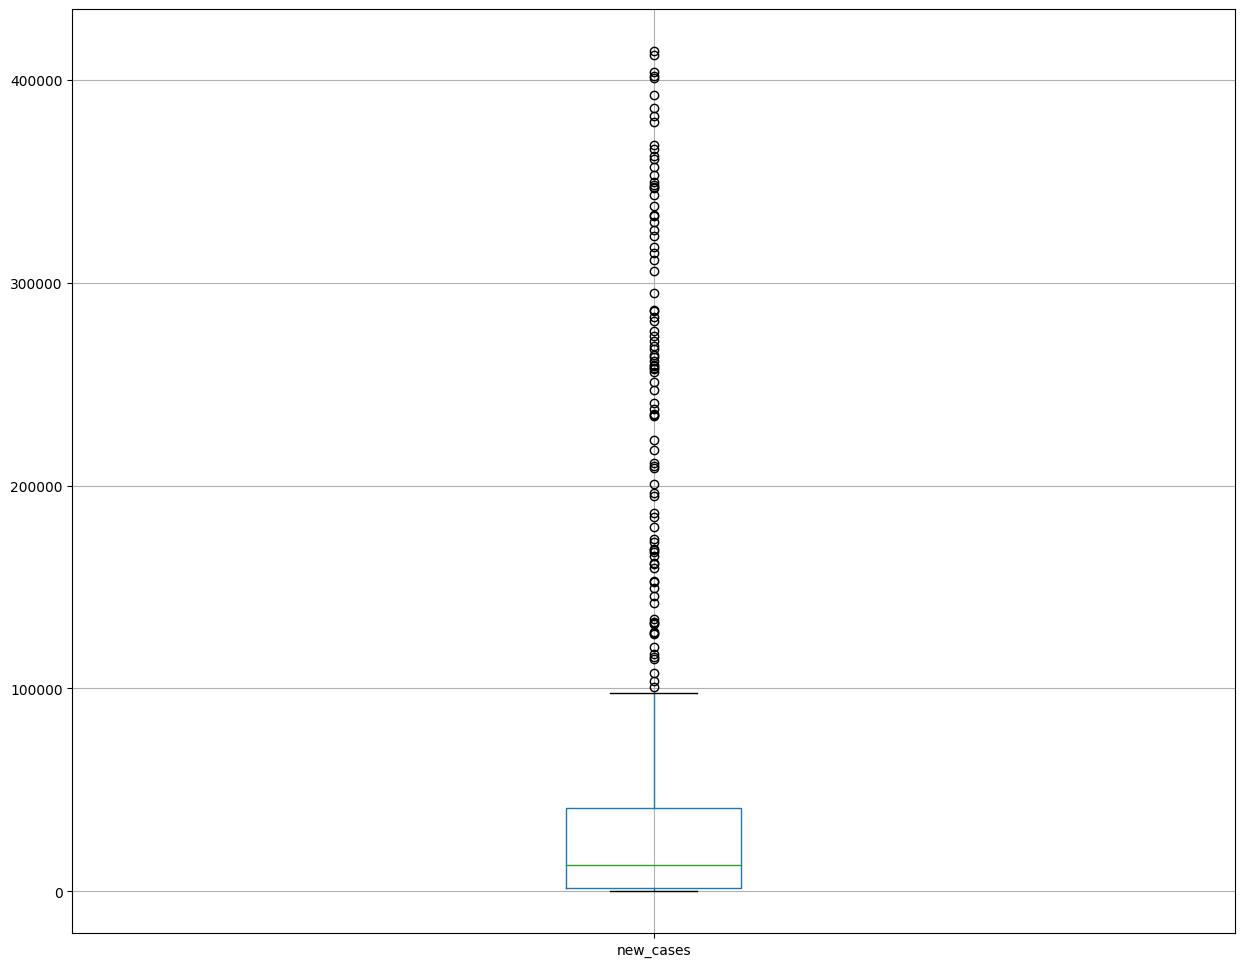

In [56]:
Main_Data.boxplot('new_cases')

### Violin Plots

<AxesSubplot: >

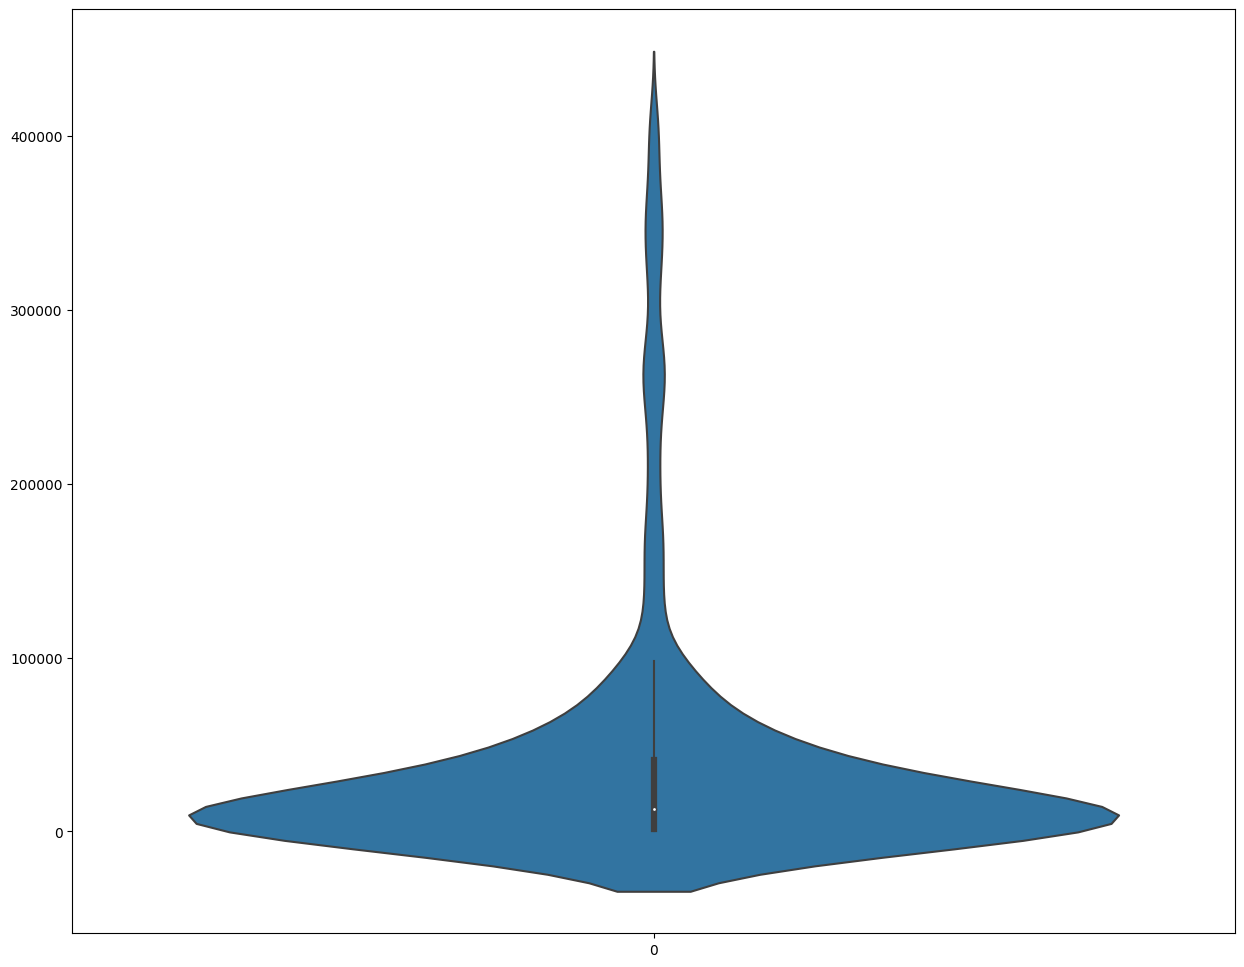

In [62]:
seaborn.violinplot(Main_Data['new_cases'])

<AxesSubplot: >

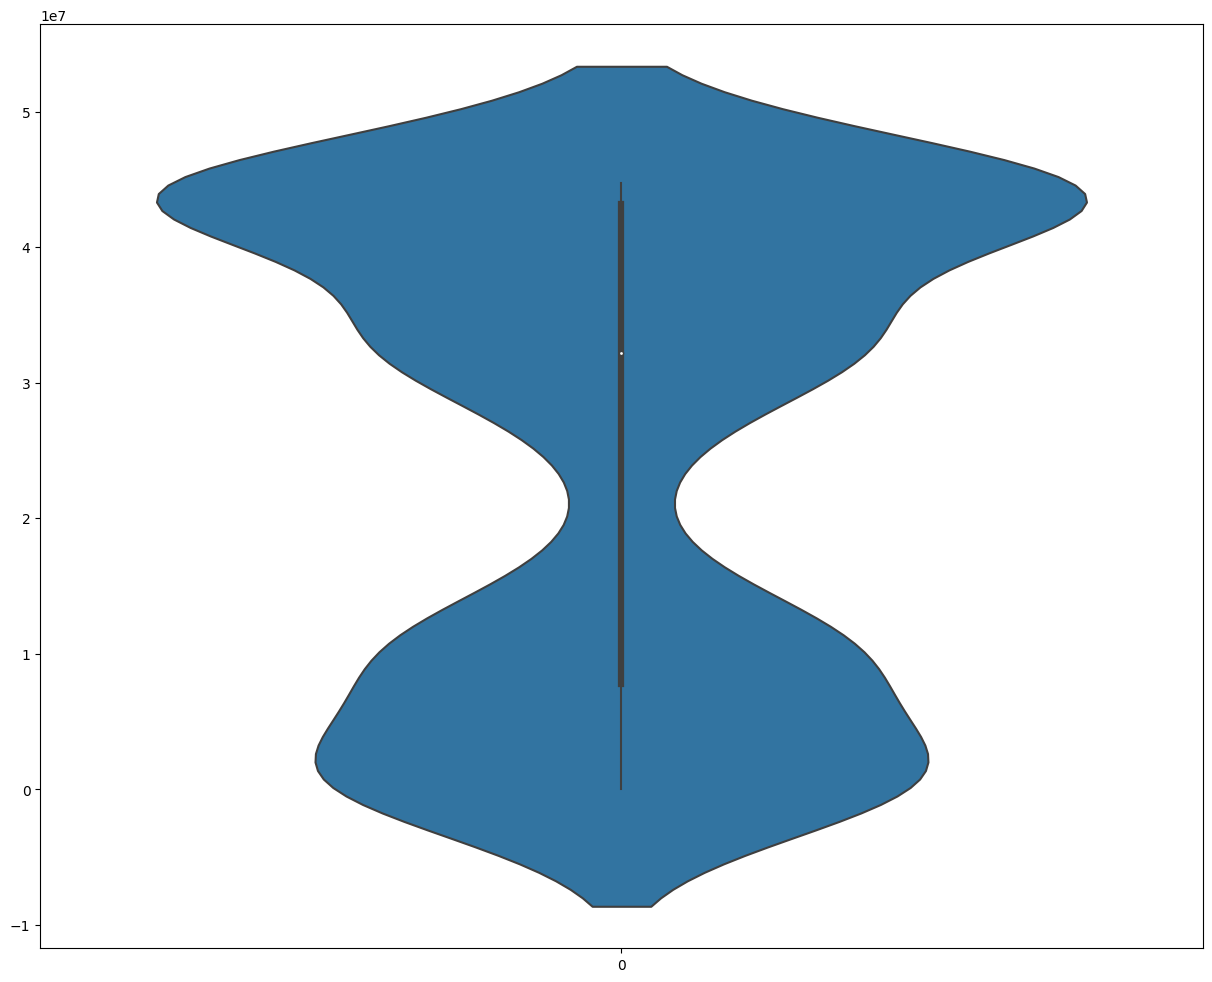

In [58]:
seaborn.violinplot(Main_Data['total_cases'])

<AxesSubplot: >

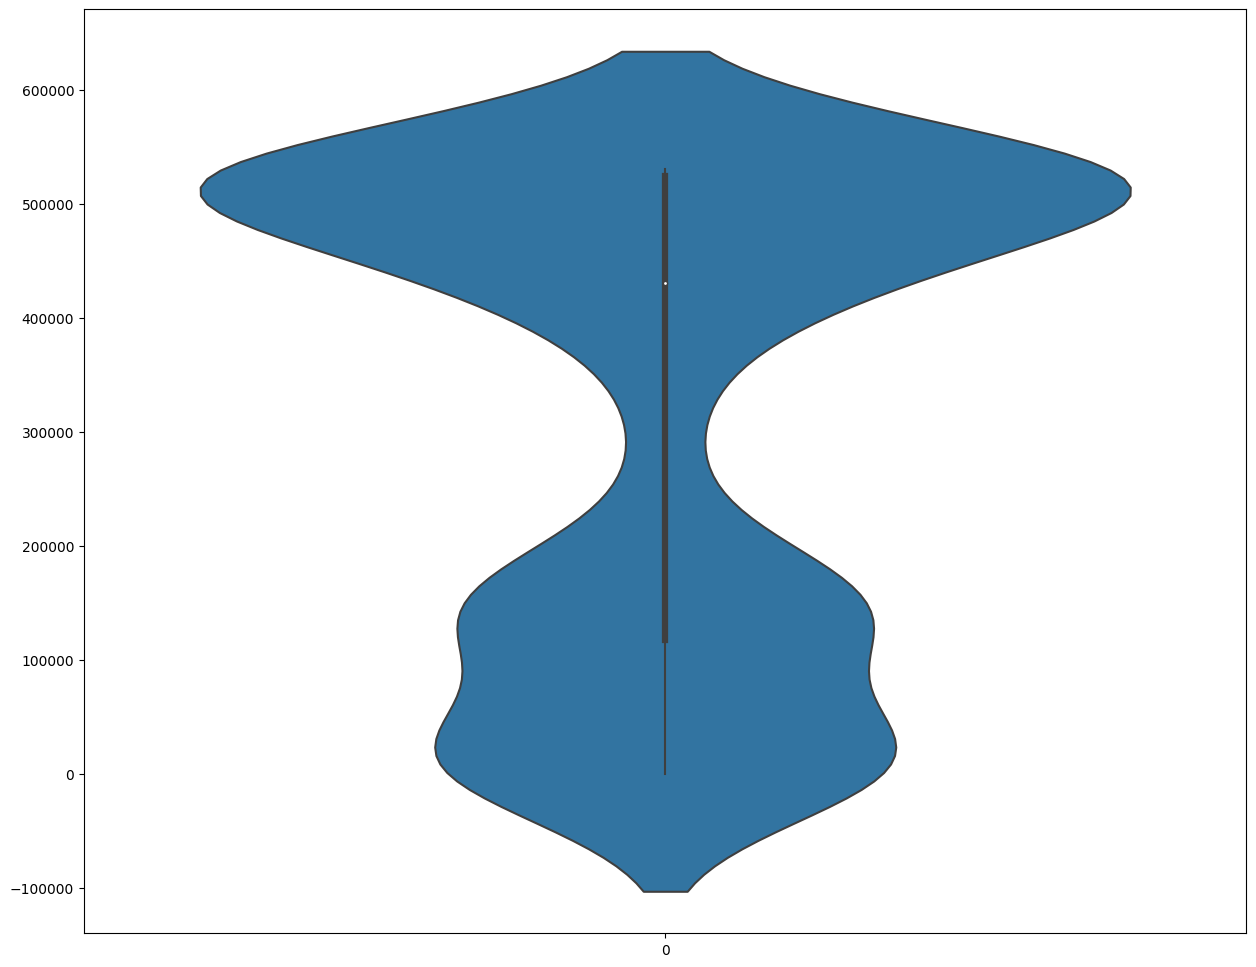

In [59]:
seaborn.violinplot(Main_Data['total_deaths'])

<AxesSubplot: >

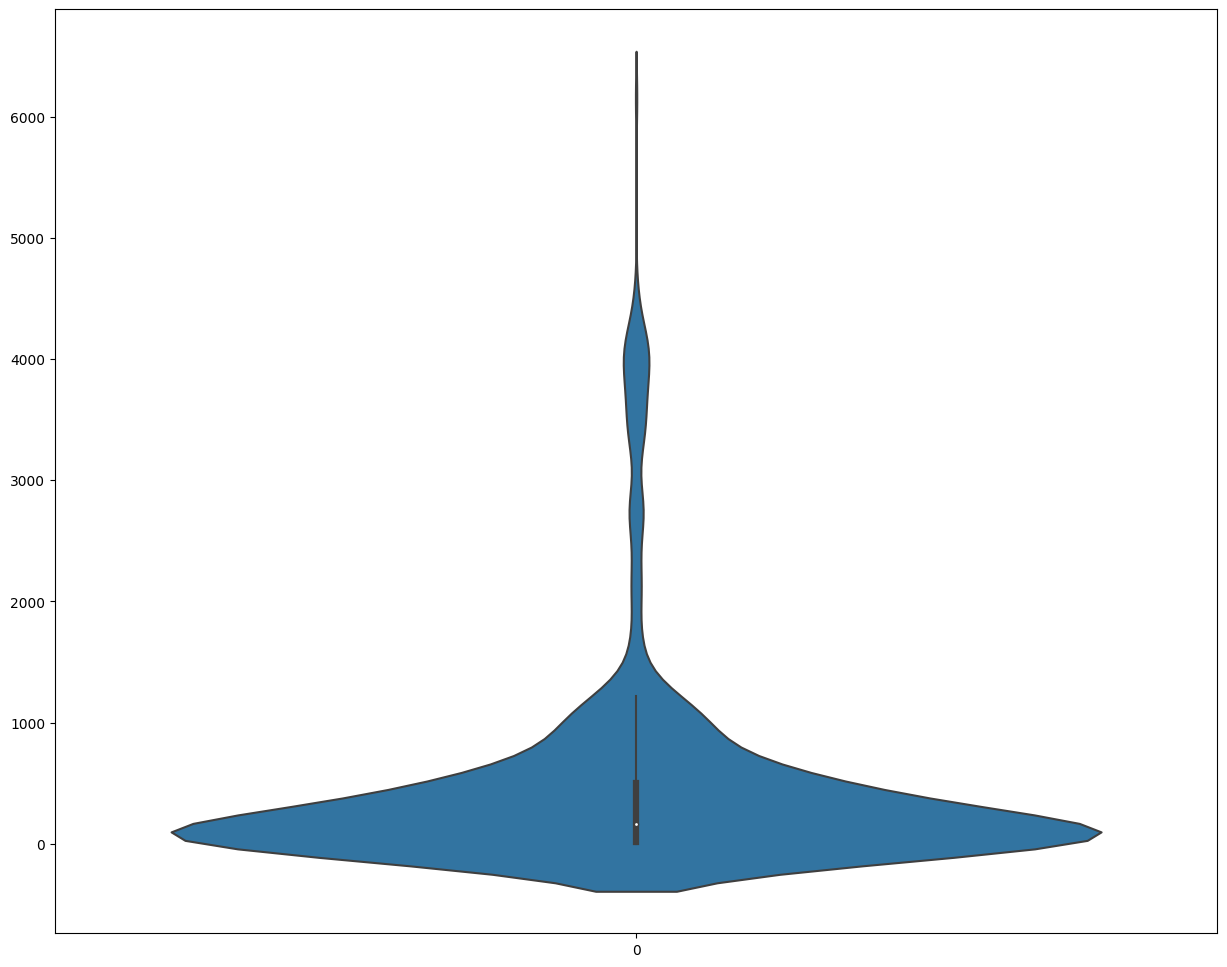

In [60]:
seaborn.violinplot(Main_Data['new_deaths'])

### distplot

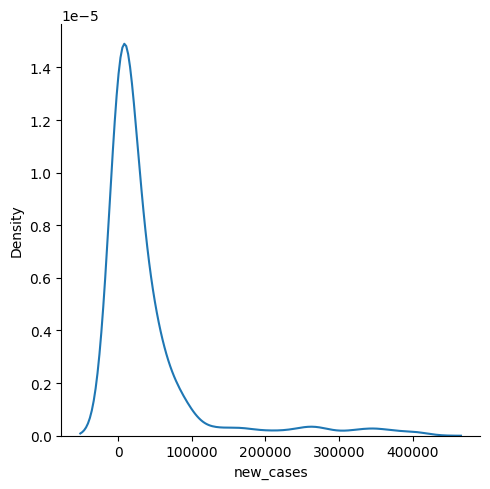

In [64]:
seaborn.displot(Main_Data['new_cases'],kind='kde')

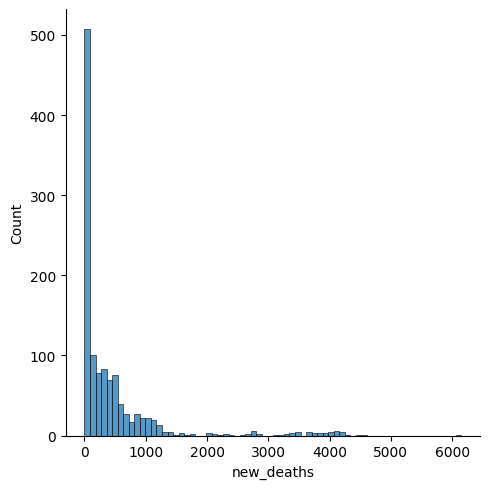

In [65]:
seaborn.displot(Main_Data['new_deaths'],kind='hist')

### joinplot

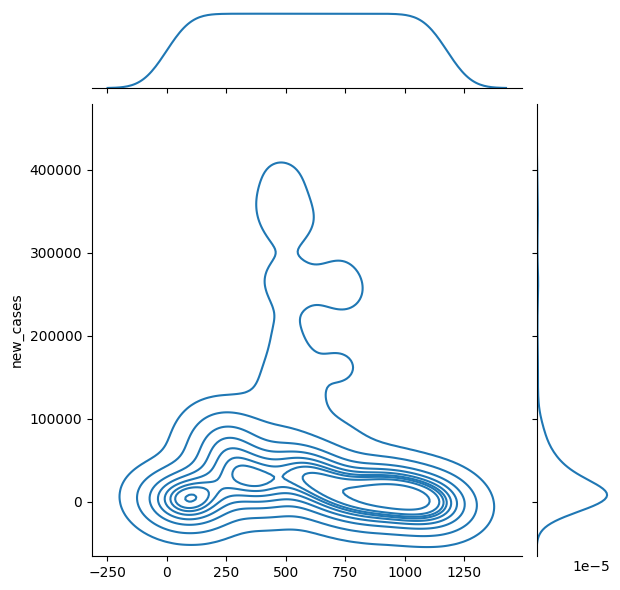

In [66]:
seaborn.jointplot(Main_Data['new_cases'],kind='kde')

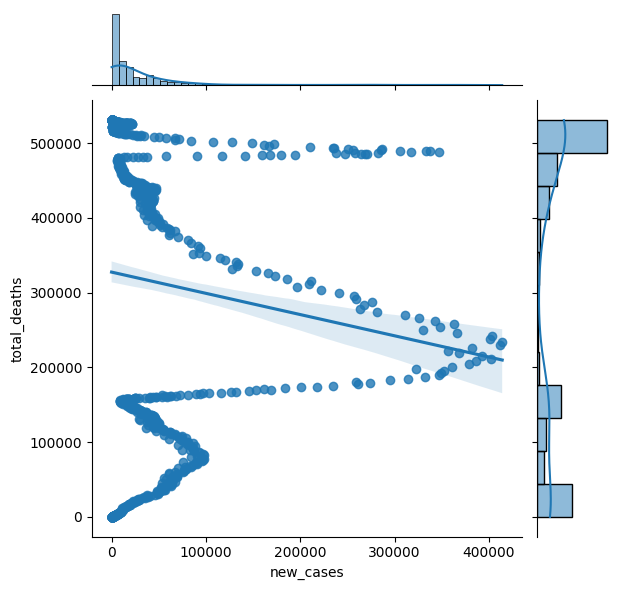

In [67]:
seaborn.jointplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'],kind="reg")

### pairplot


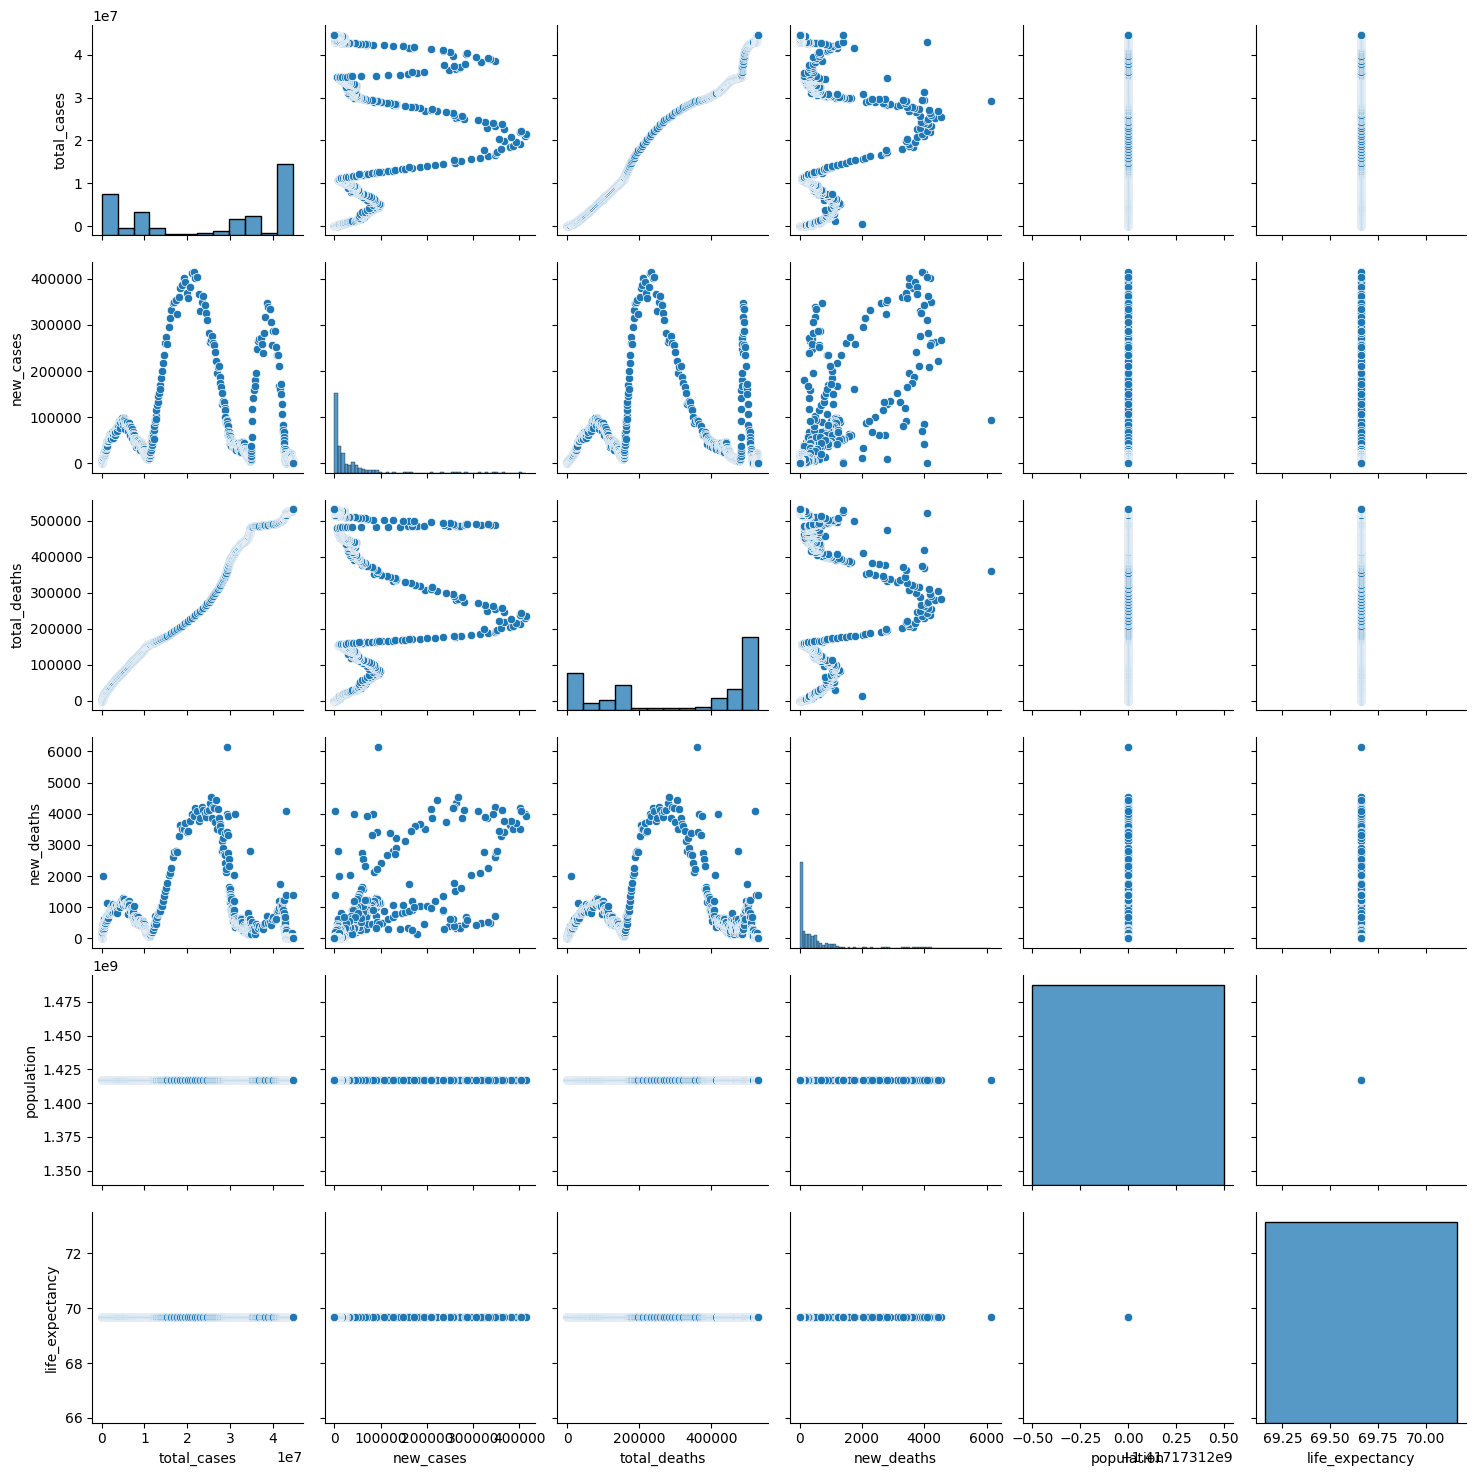

In [68]:
seaborn.pairplot(Main_Data)

### rugplot

### countplot

<AxesSubplot: xlabel='new_cases', ylabel='total_deaths'>

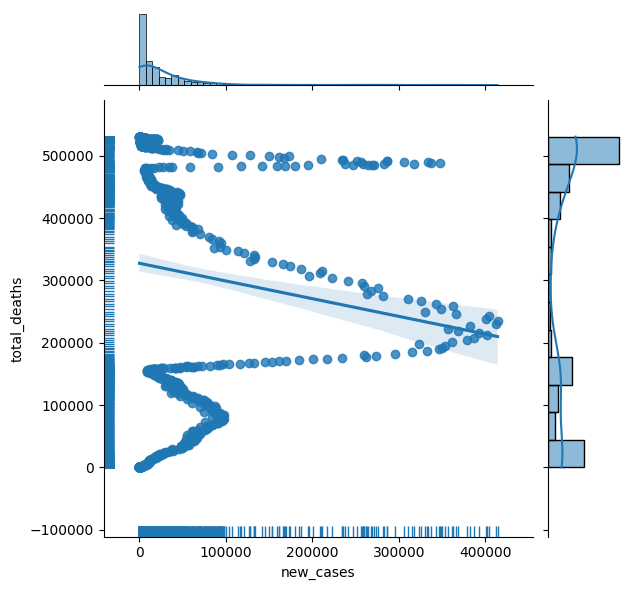

In [69]:
seaborn.jointplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'],kind="reg")
seaborn.rugplot(x=Main_Data['new_cases'],y=Main_Data['total_deaths'])

<AxesSubplot: xlabel='continent', ylabel='count'>

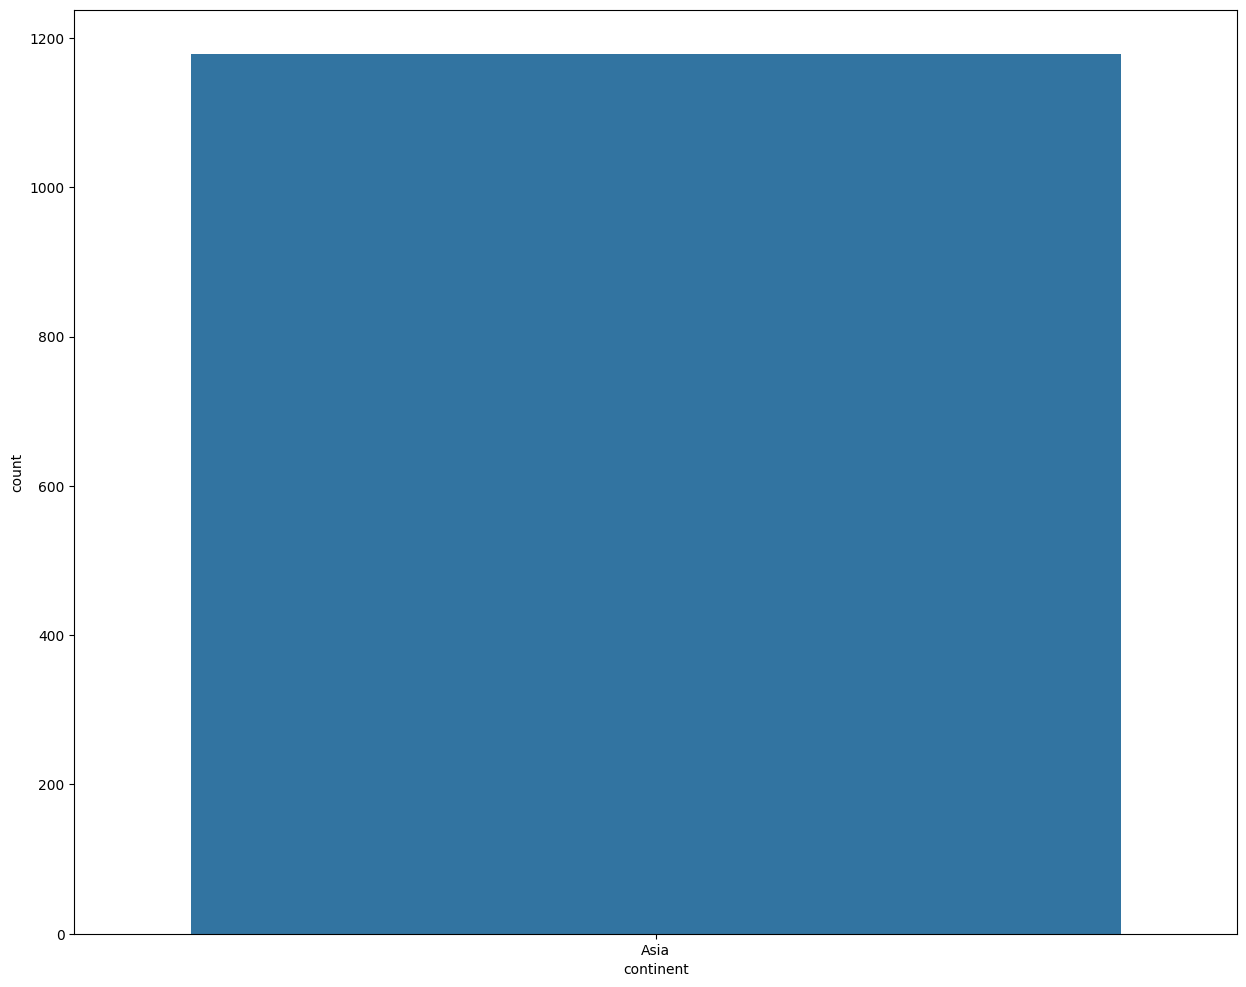

In [70]:
seaborn.countplot(
    x=Main_Data['continent'],
)

### stripplot

<AxesSubplot: xlabel='total_cases', ylabel='continent'>

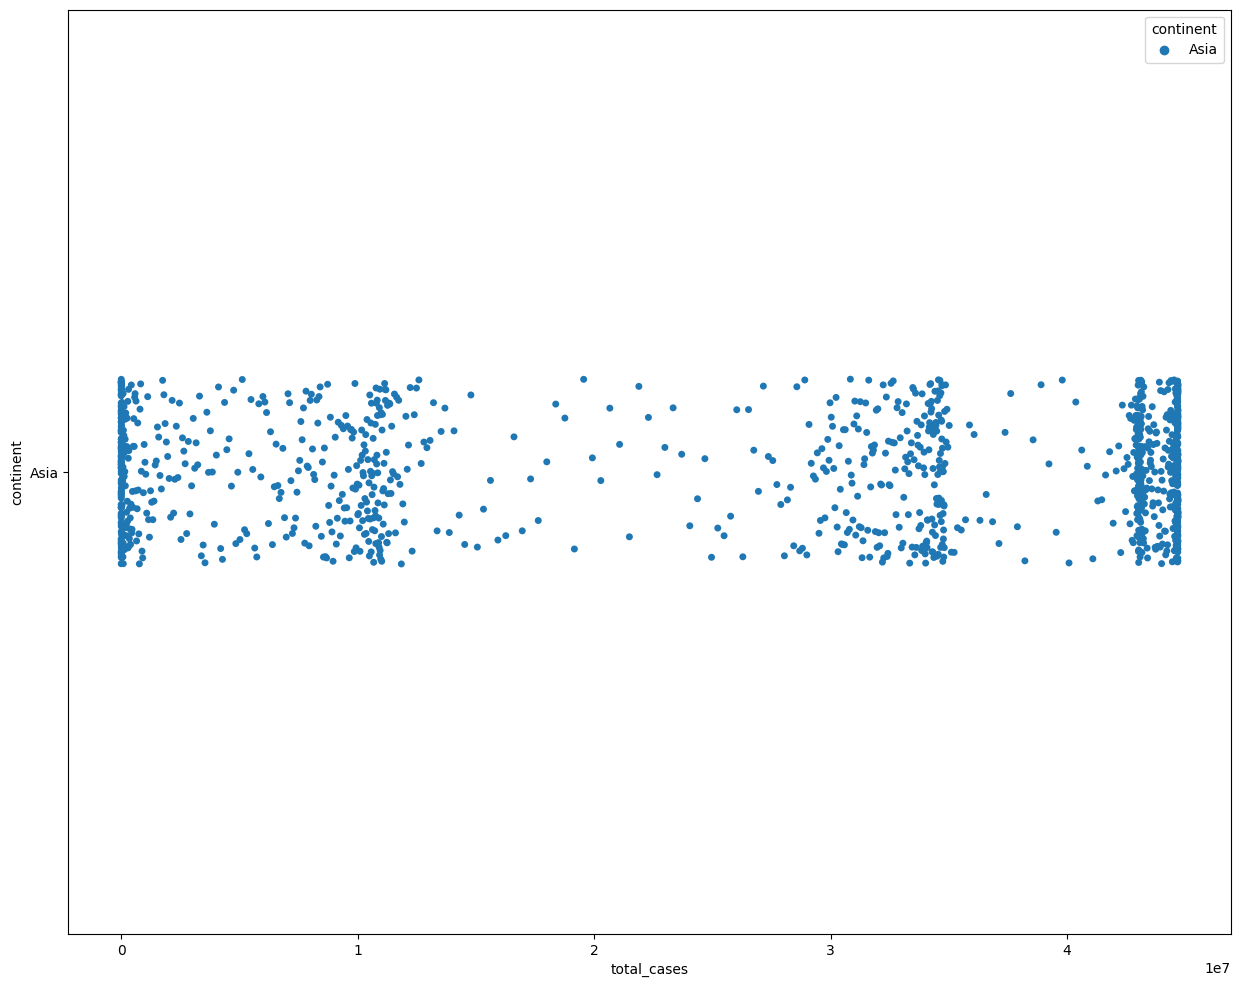

In [48]:
seaborn.stripplot(
    Main_Data,x='total_cases',y='continent',hue='continent'
)

### swarmplot

<AxesSubplot: xlabel='continent', ylabel='total_cases'>

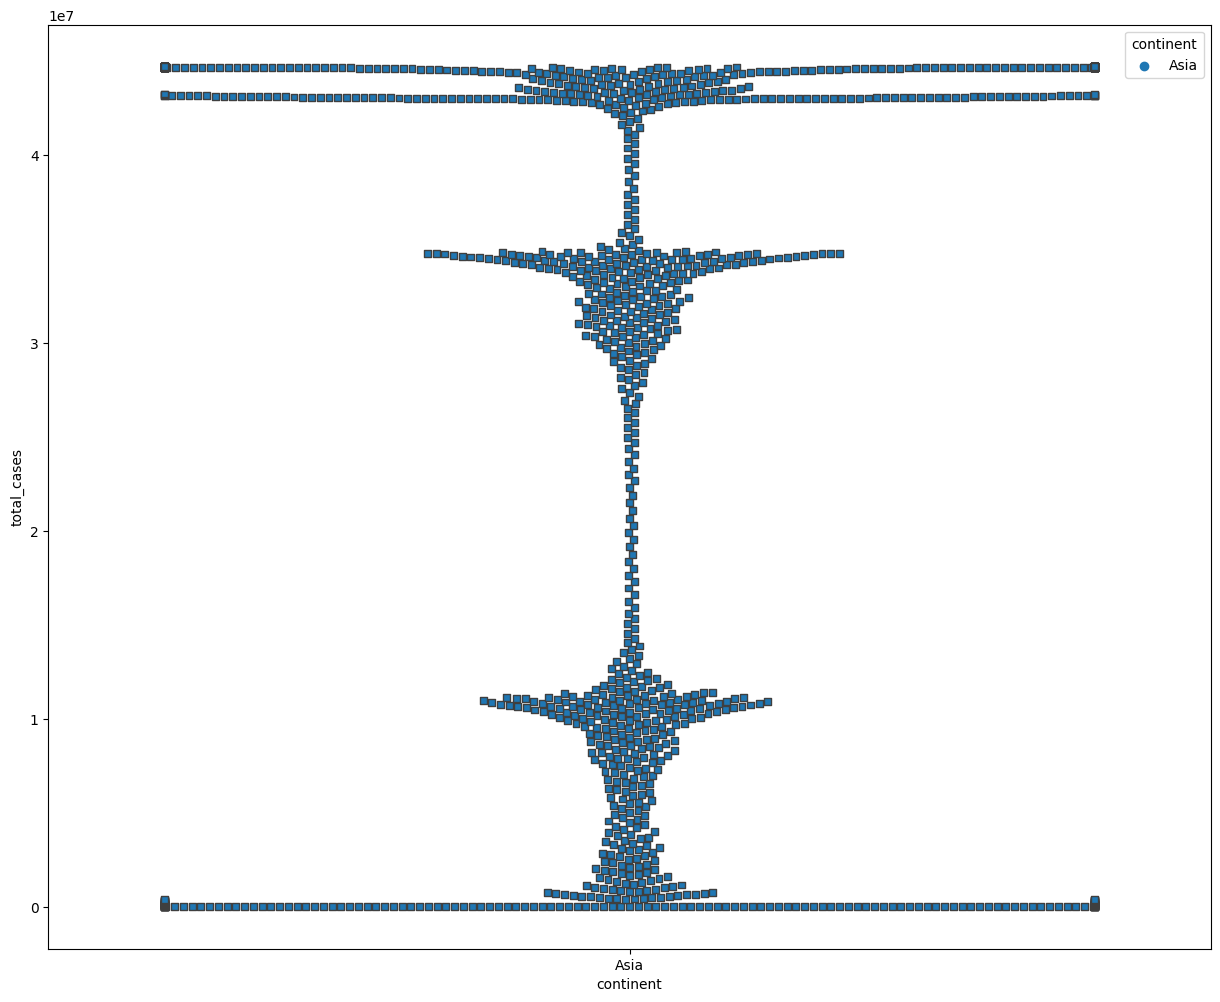

In [47]:
seaborn.swarmplot(
    Main_Data,x='continent',y='total_cases',hue='continent',marker="s", linewidth=1
)

### heatmap

<AxesSubplot: >

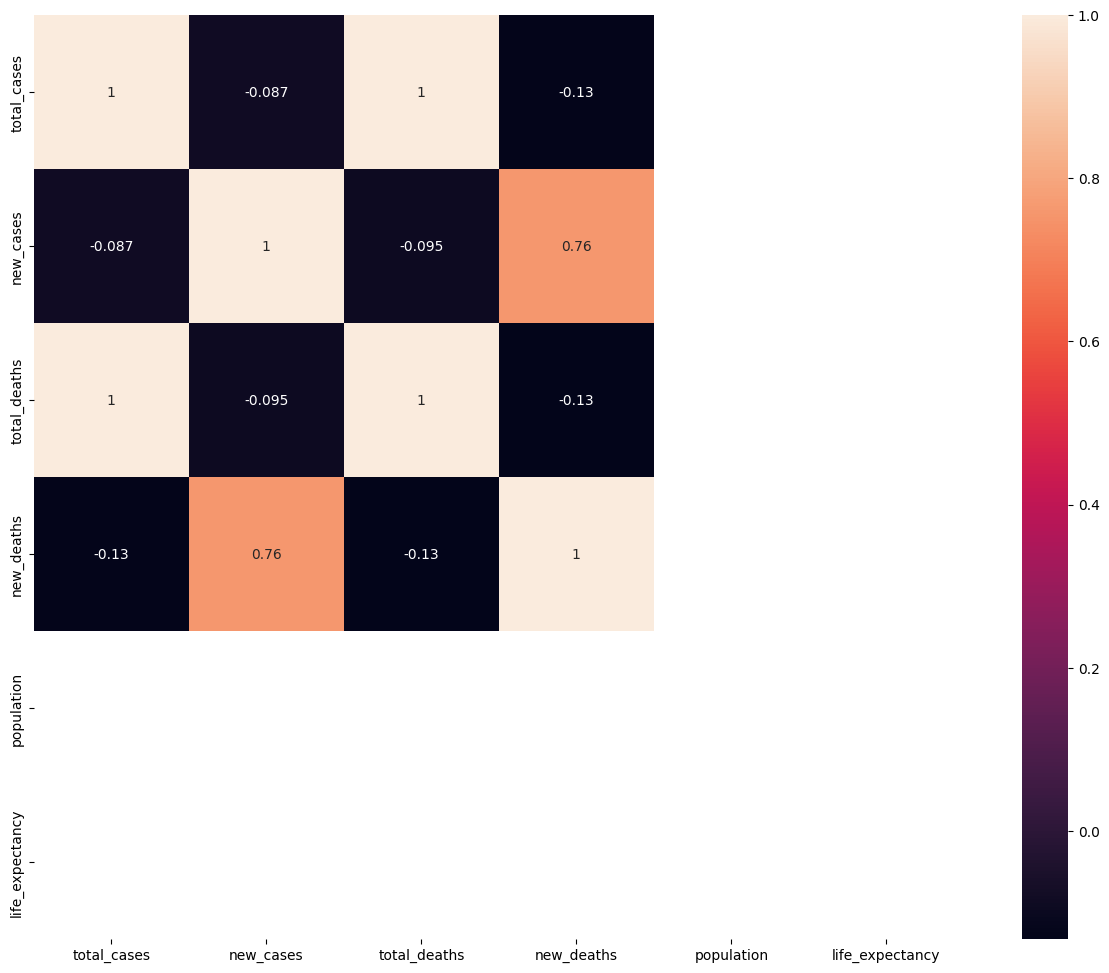

In [76]:
seaborn.heatmap(Main_Data.corr(),annot=True)

### clusrmap

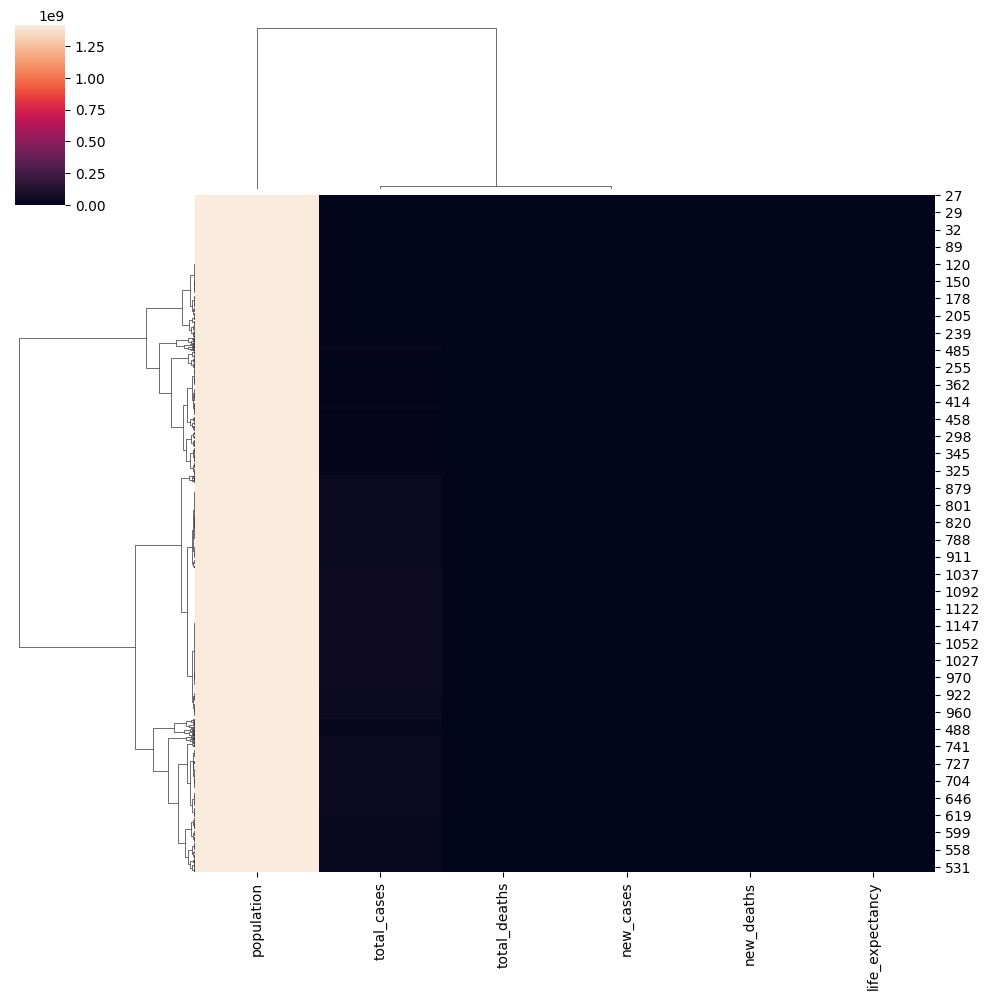

In [39]:
seaborn.clustermap(Main_Data[Main_Data.describe().columns])

### lmplot


In [ ]:
seaborn.lmplot(Main_Data,x='total_cases',y='population',hue='continent')

### facetgrid

In [161]:
seaborn.get_dataset_names()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']

In [166]:
Temp_Datasets=seaborn.load_dataset('tips')

In [167]:
Temp_Datasets

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

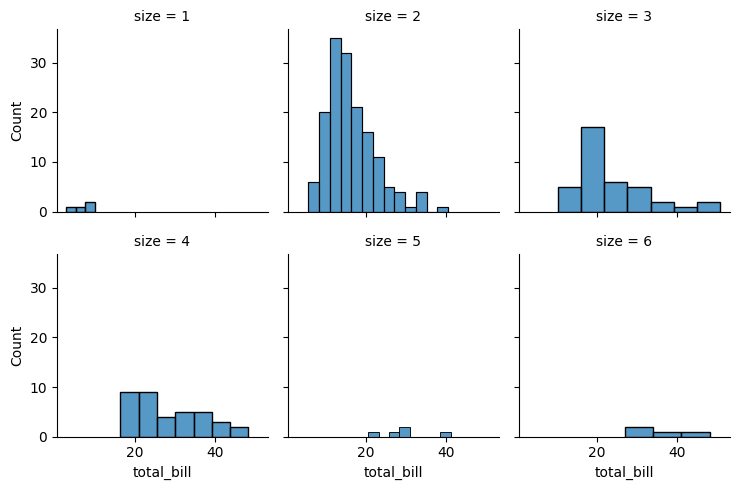

In [173]:
seaborn.FacetGrid(Temp_Datasets, col="size", height=2.5, col_wrap=3).map(seaborn.histplot,'total_bill')

### Scatter Plots

<AxesSubplot: xlabel='date', ylabel='total_cases'>

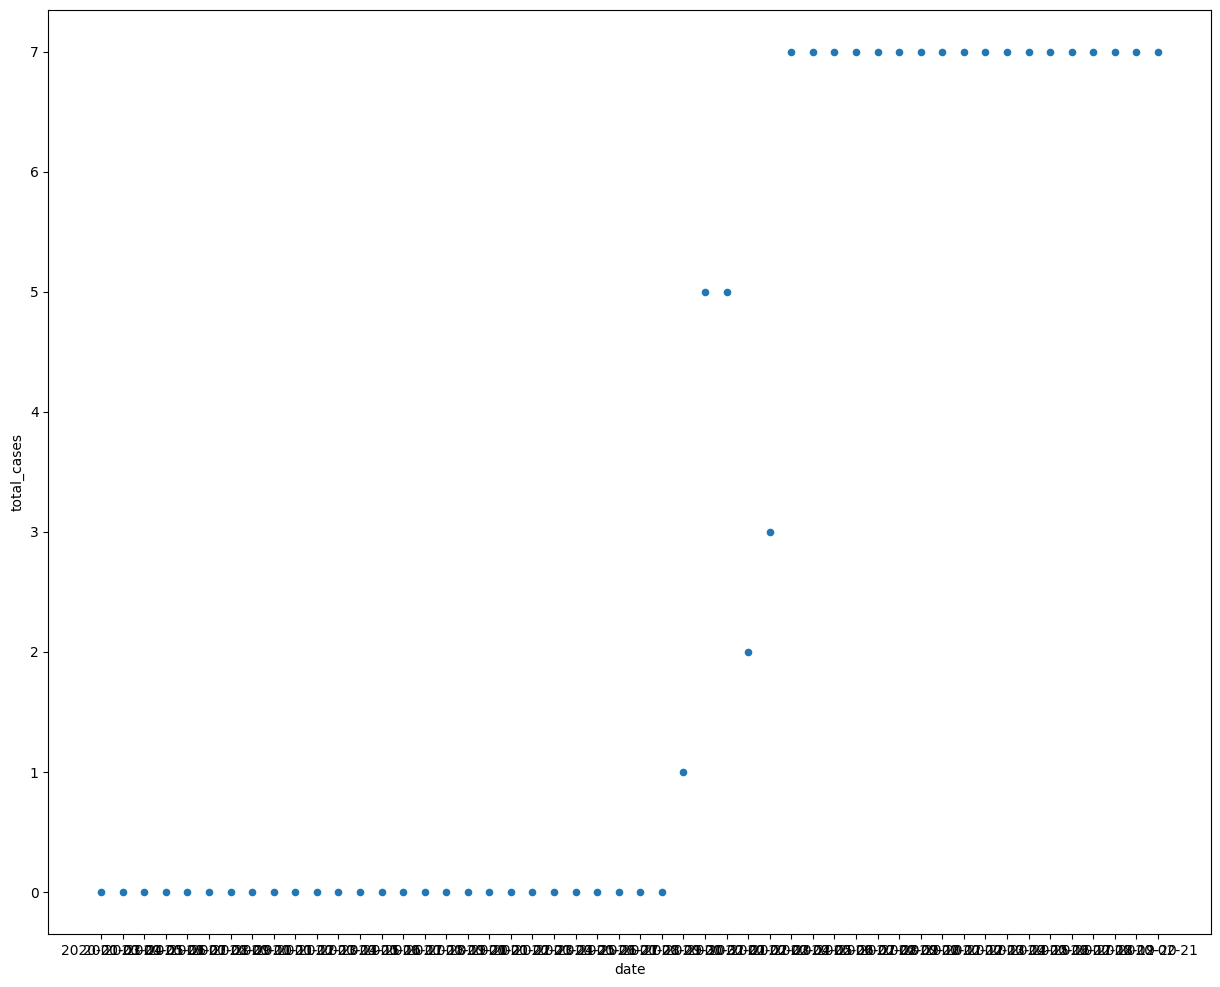

In [49]:
Main_Data[:50].plot.scatter(x='date',y='total_cases')

<AxesSubplot: xlabel='date', ylabel='life_expectancy'>

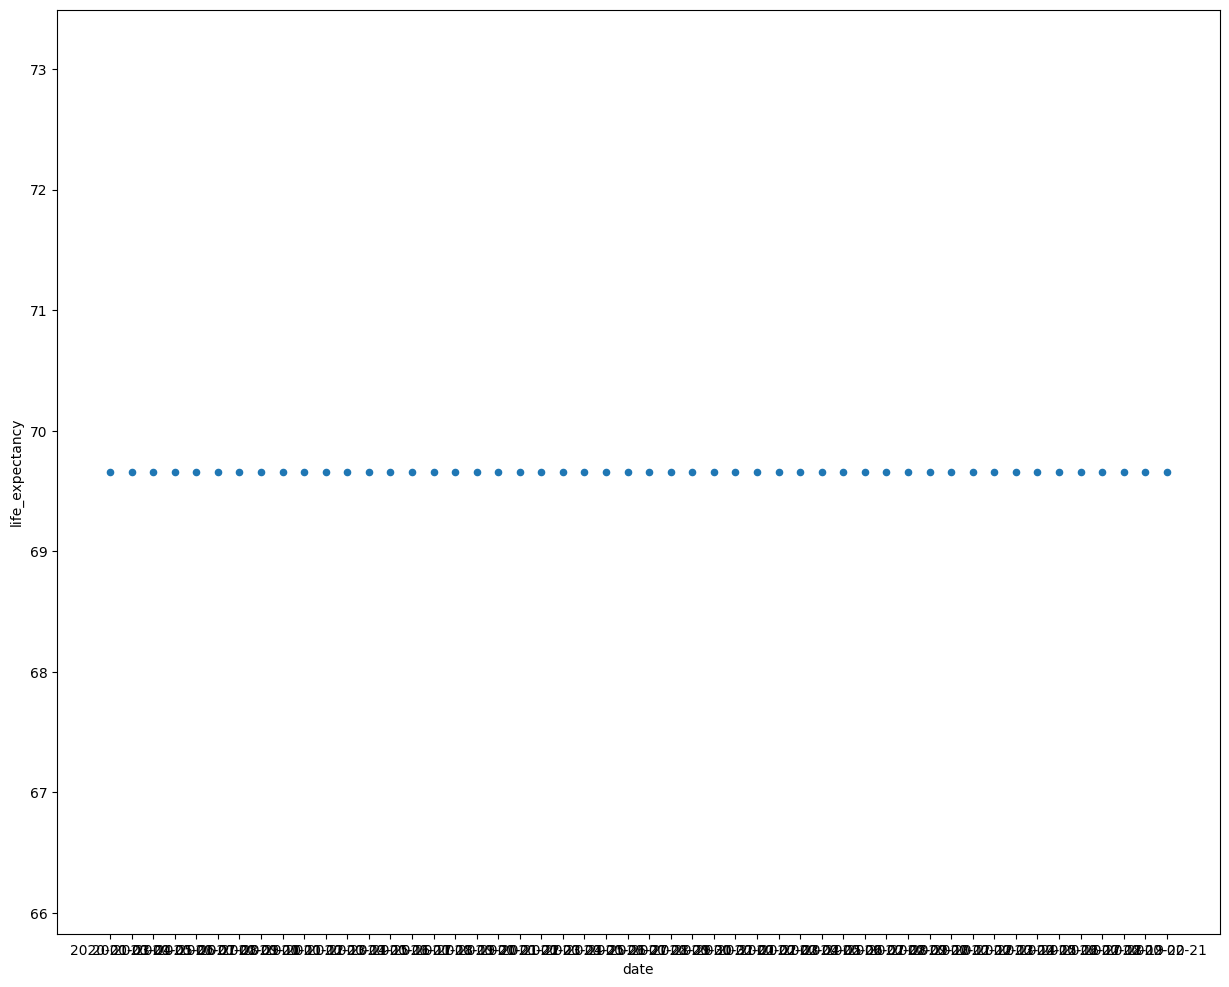

In [50]:
Main_Data[:50].plot.scatter(x='date',y='life_expectancy')

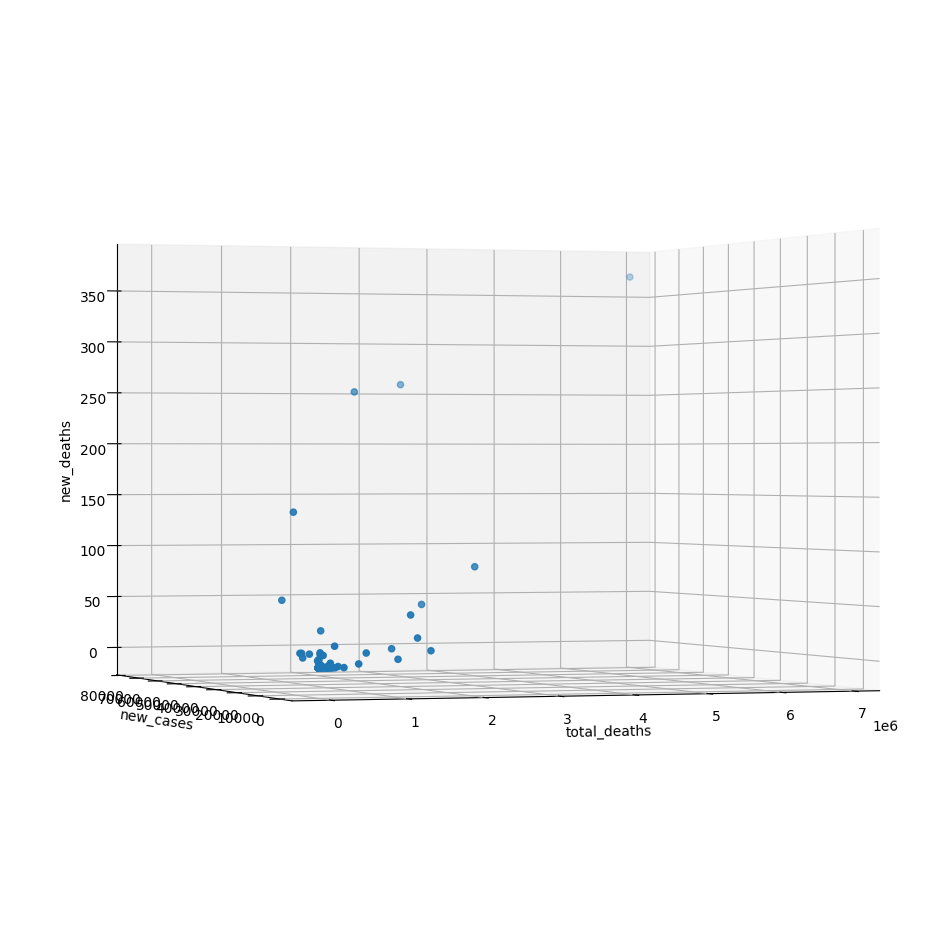

In [177]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Main_Data['total_deaths'],Main_Data['new_cases'],Main_Data['new_deaths'])
plotter.set_xlabel('total_deaths')
plotter.set_ylabel('new_cases')
plotter.set_zlabel('new_deaths')
plotter.view_init(0, 250)

### Area charts

### Bar Charts

<AxesSubplot: >

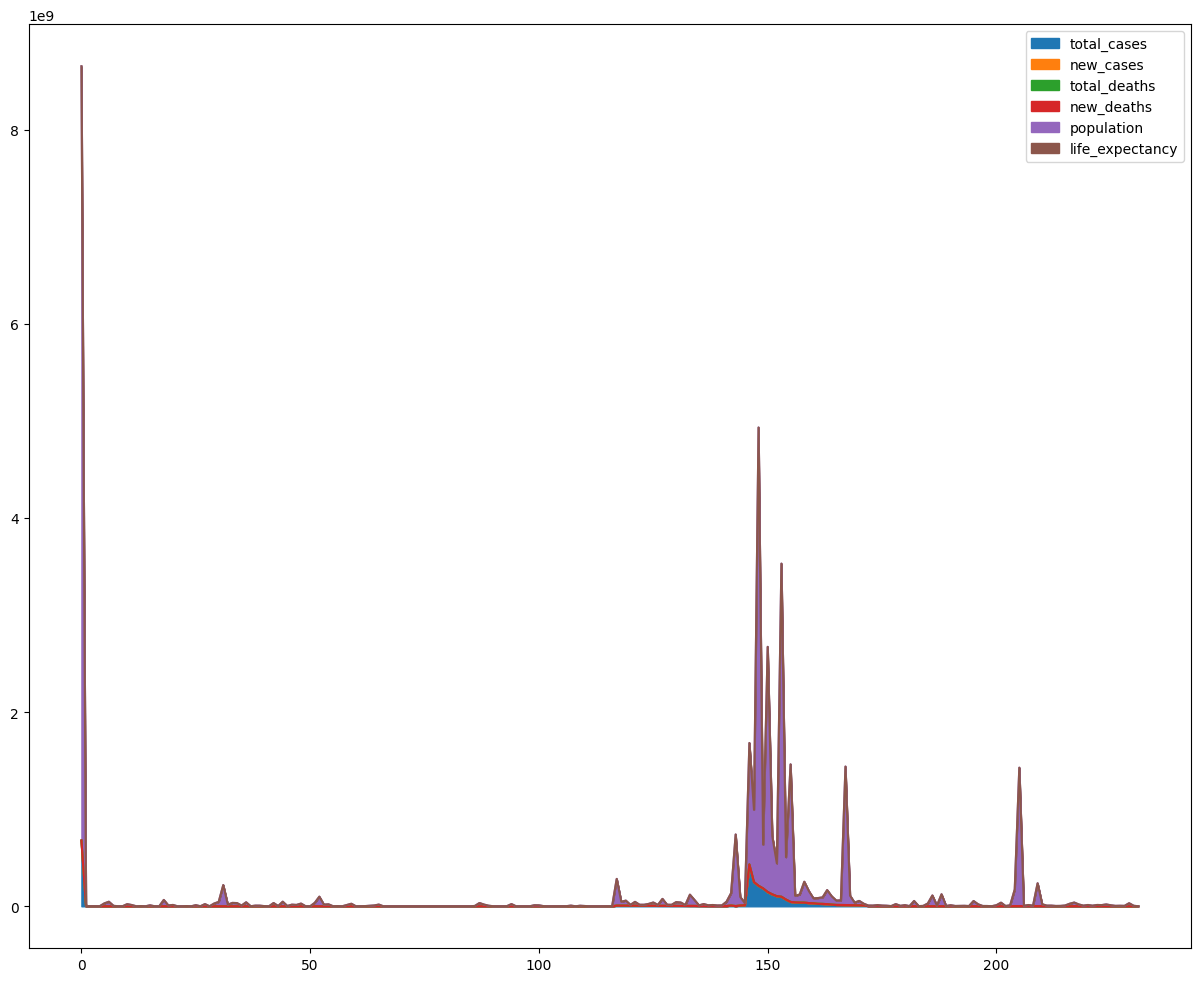

In [182]:
Main_Data.plot.area()

<AxesSubplot: xlabel='location'>

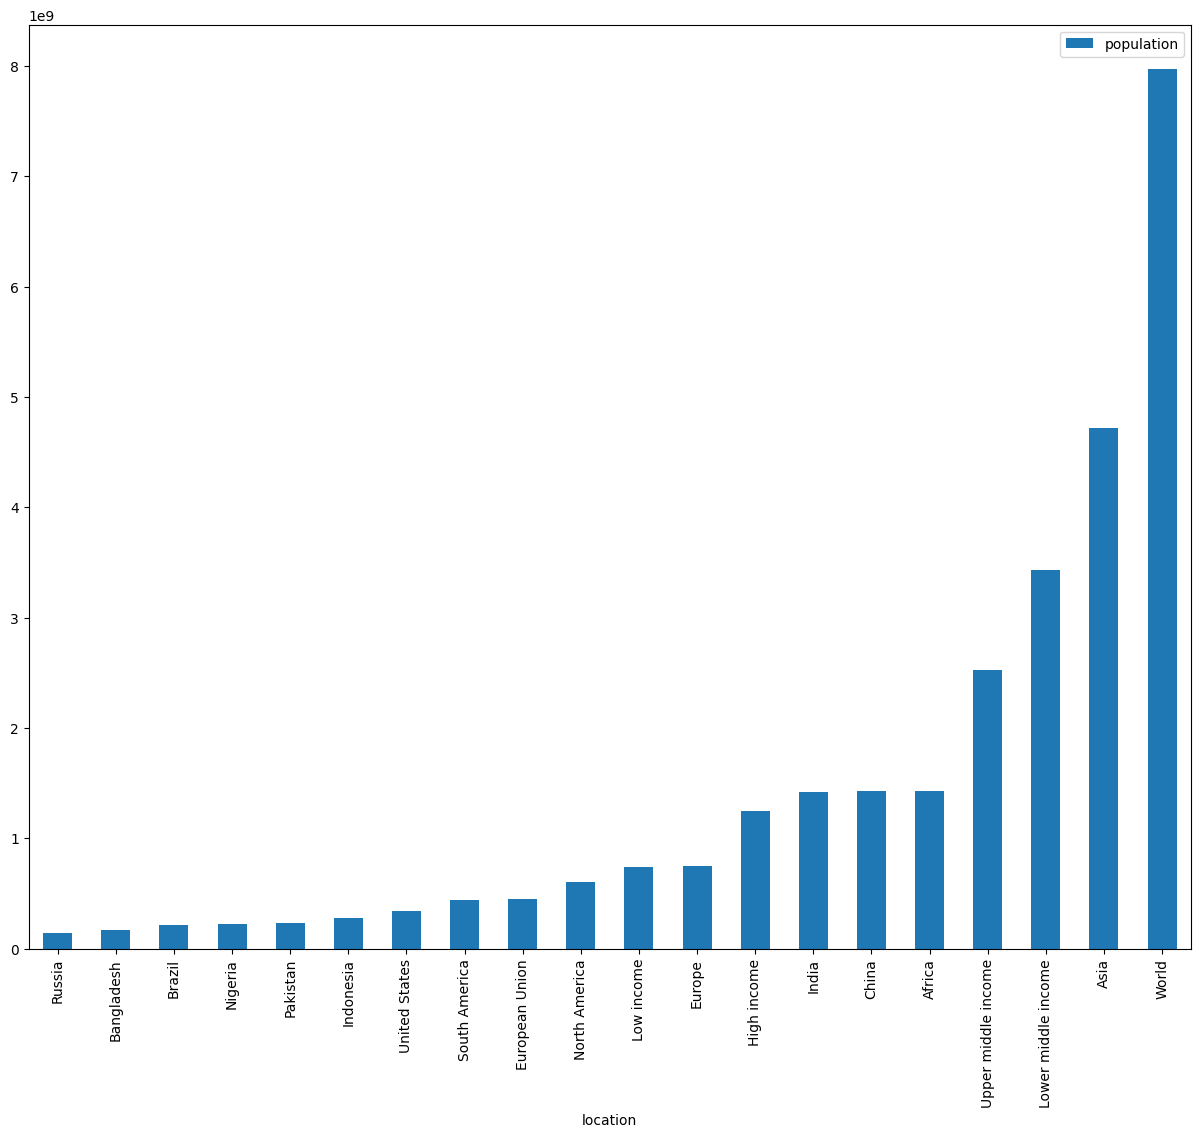

In [191]:
Main_Data.sort_values(by='population')[-20:].plot.bar(y='population',x='location')

<AxesSubplot: xlabel='location'>

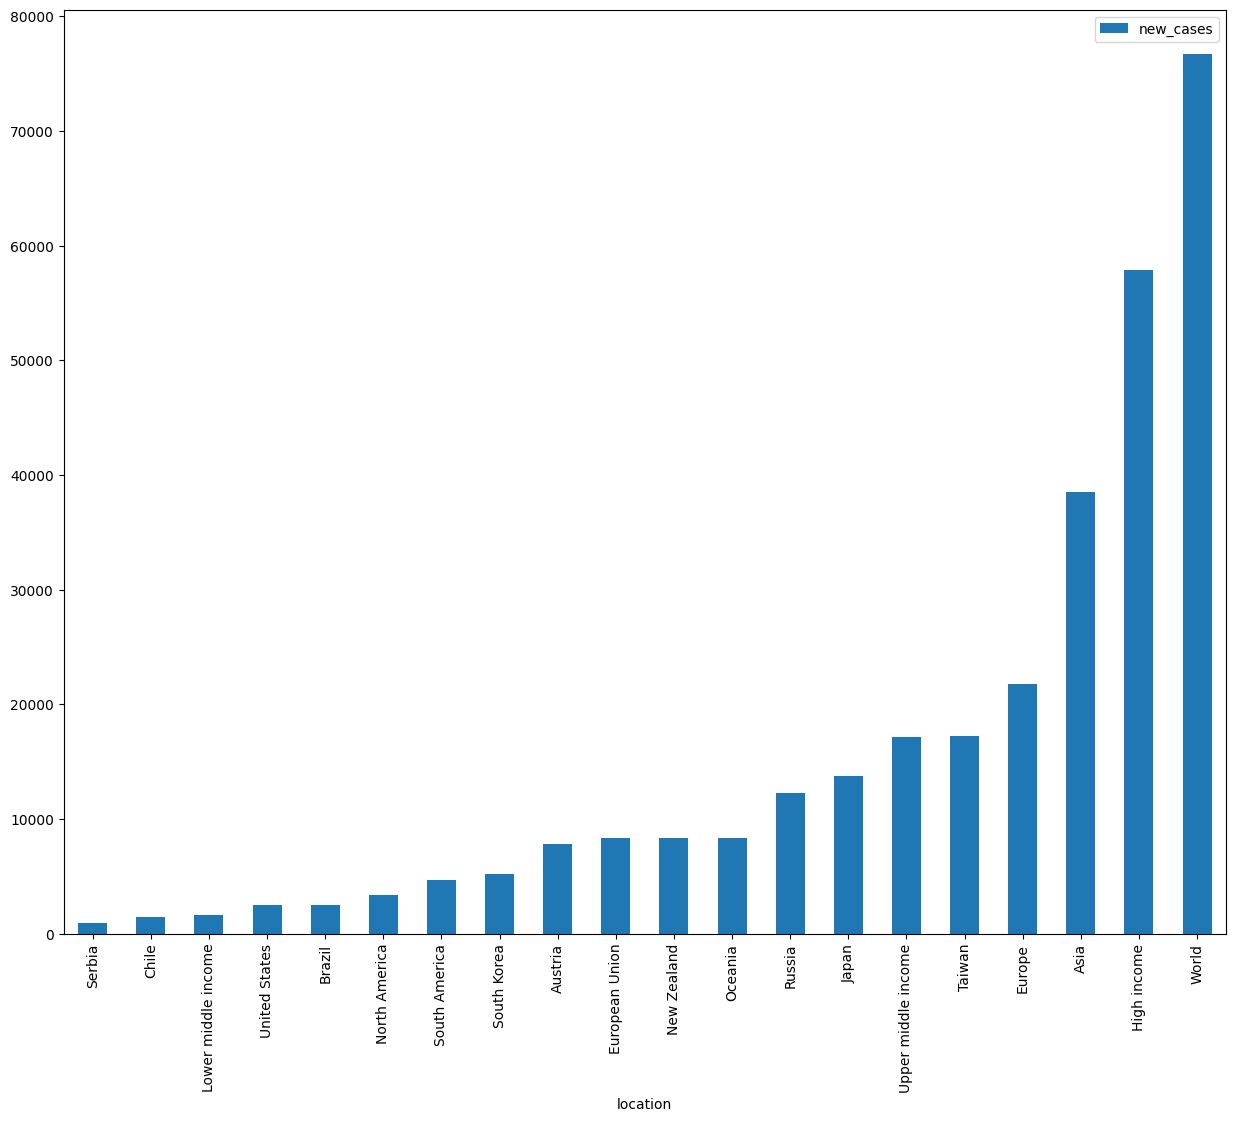

In [192]:
Main_Data.sort_values(by='new_cases')[-20:].plot.bar(y='new_cases',x='location')

### Histograms

(array([ 3.,  2.,  0.,  4.,  4.,  5.,  7.,  3., 12.,  5., 10.,  2.,  9.,
       13., 17., 20., 20., 22., 12., 15., 13., 18., 11.,  4.,  1.]), array([53.28  , 54.6188, 55.9576, 57.2964, 58.6352, 59.974 , 61.3128,
       62.6516, 63.9904, 65.3292, 66.668 , 68.0068, 69.3456, 70.6844,
       72.0232, 73.362 , 74.7008, 76.0396, 77.3784, 78.7172, 80.056 ,
       81.3948, 82.7336, 84.0724, 85.4112, 86.75  ]), <BarContainer object of 25 artists>)

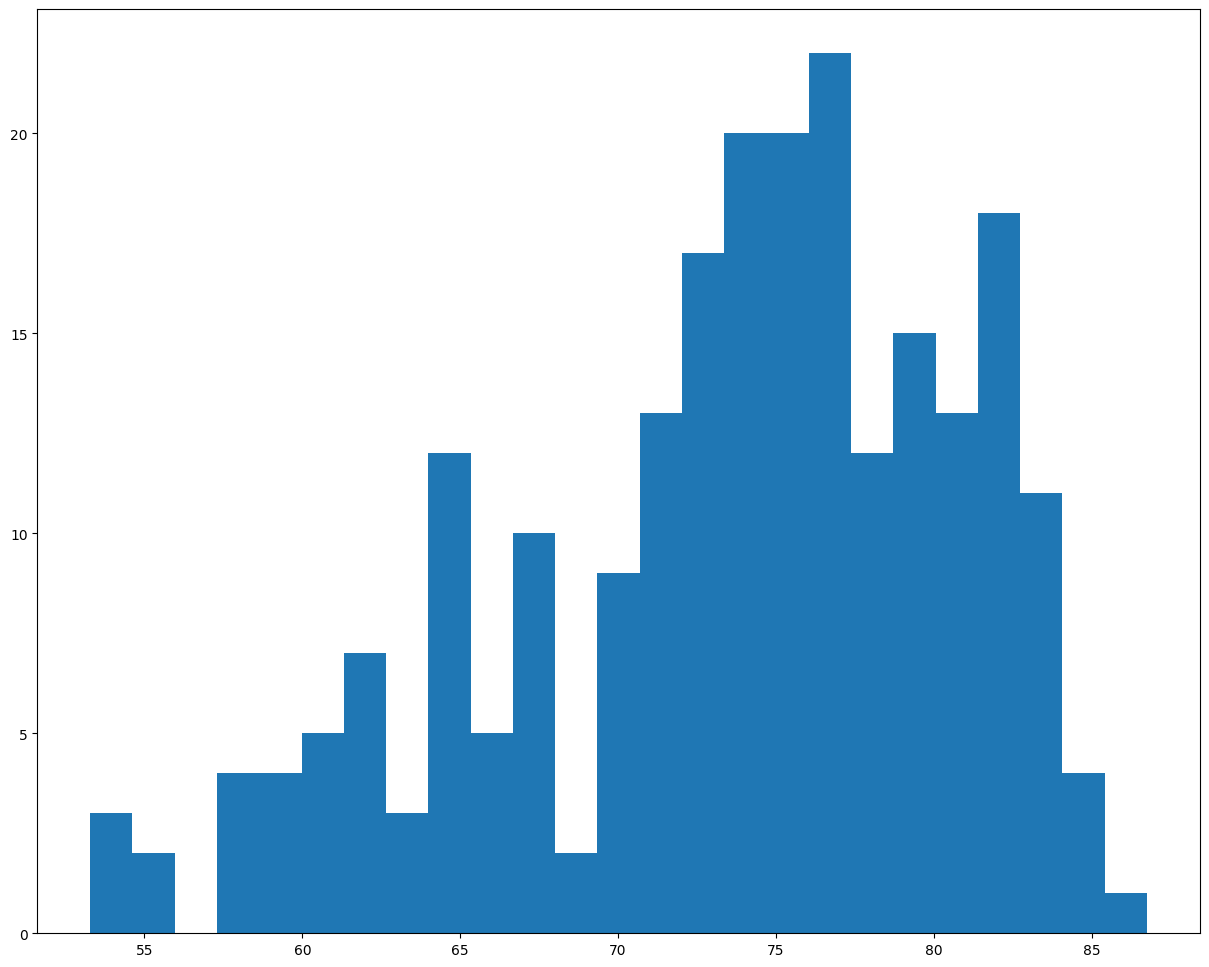

In [197]:
pyplot.hist(Main_Data['life_expectancy'],bins=25)

### Stem and Leaf Plot

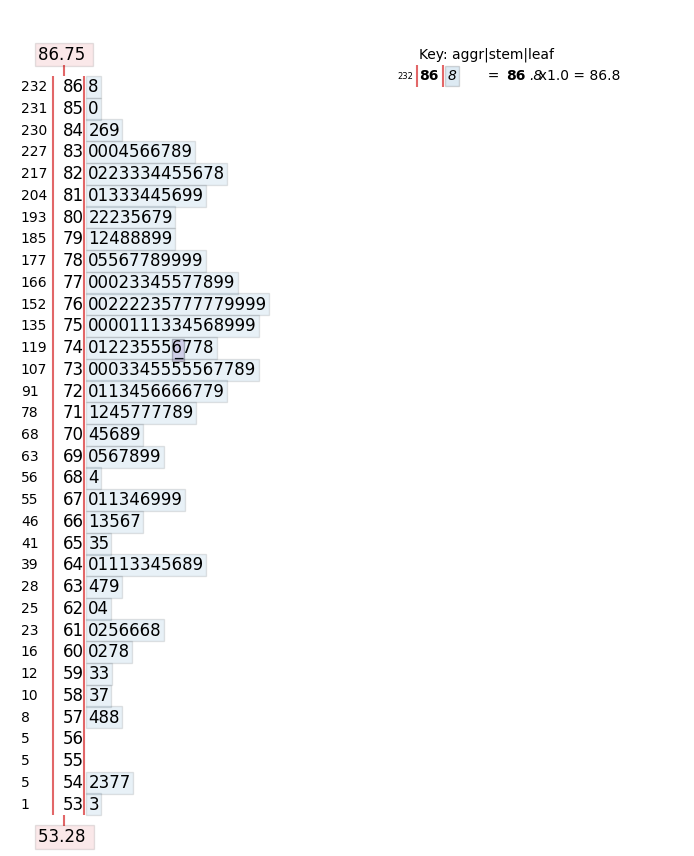

In [213]:
data=stemgraphic.stem_graphic(Main_Data['life_expectancy'])

<StemContainer object of 3 artists>

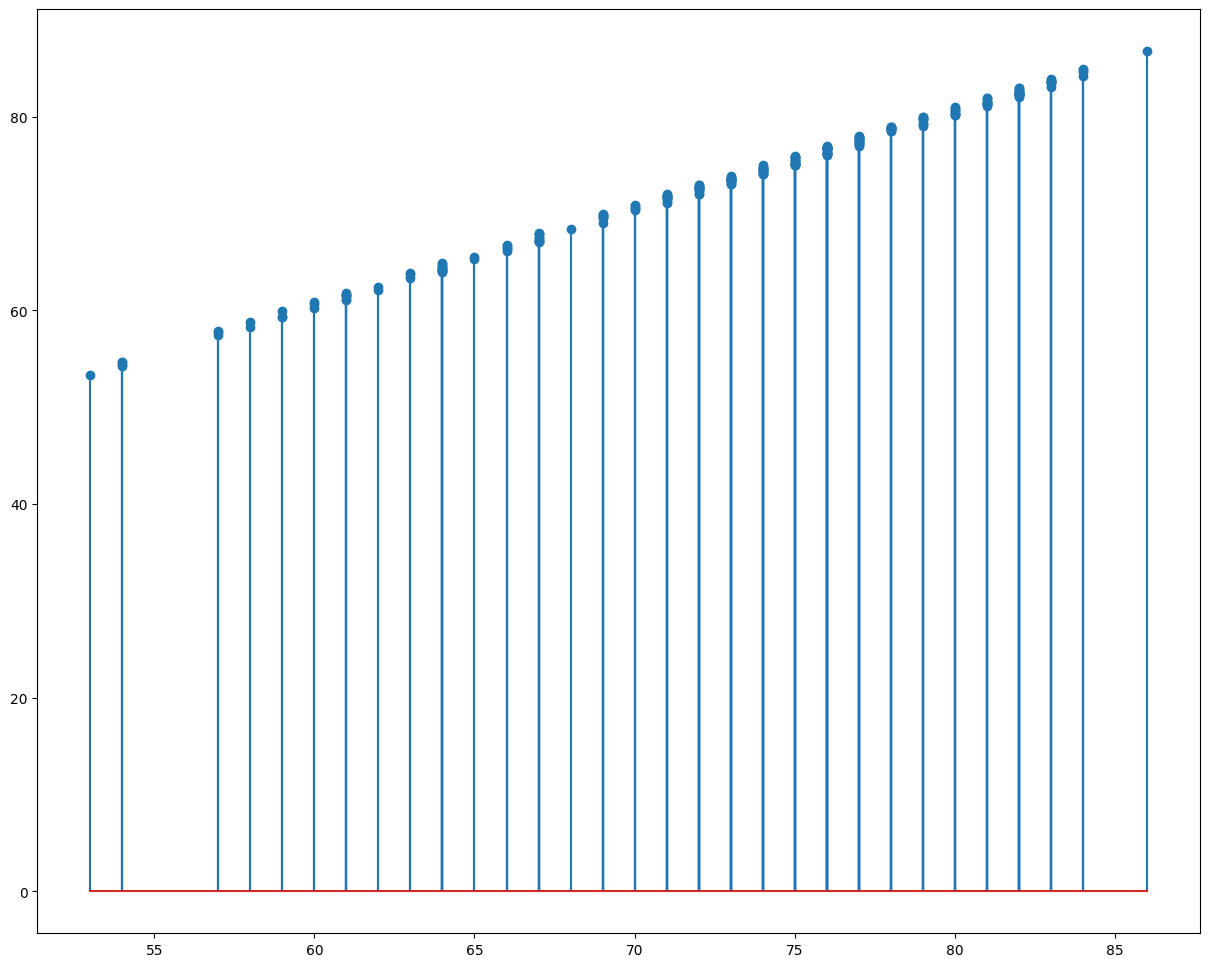

In [216]:
pyplot.stem(list((Main_Data['life_expectancy'].apply(lambda x:int(x)))),Main_Data['life_expectancy'])

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

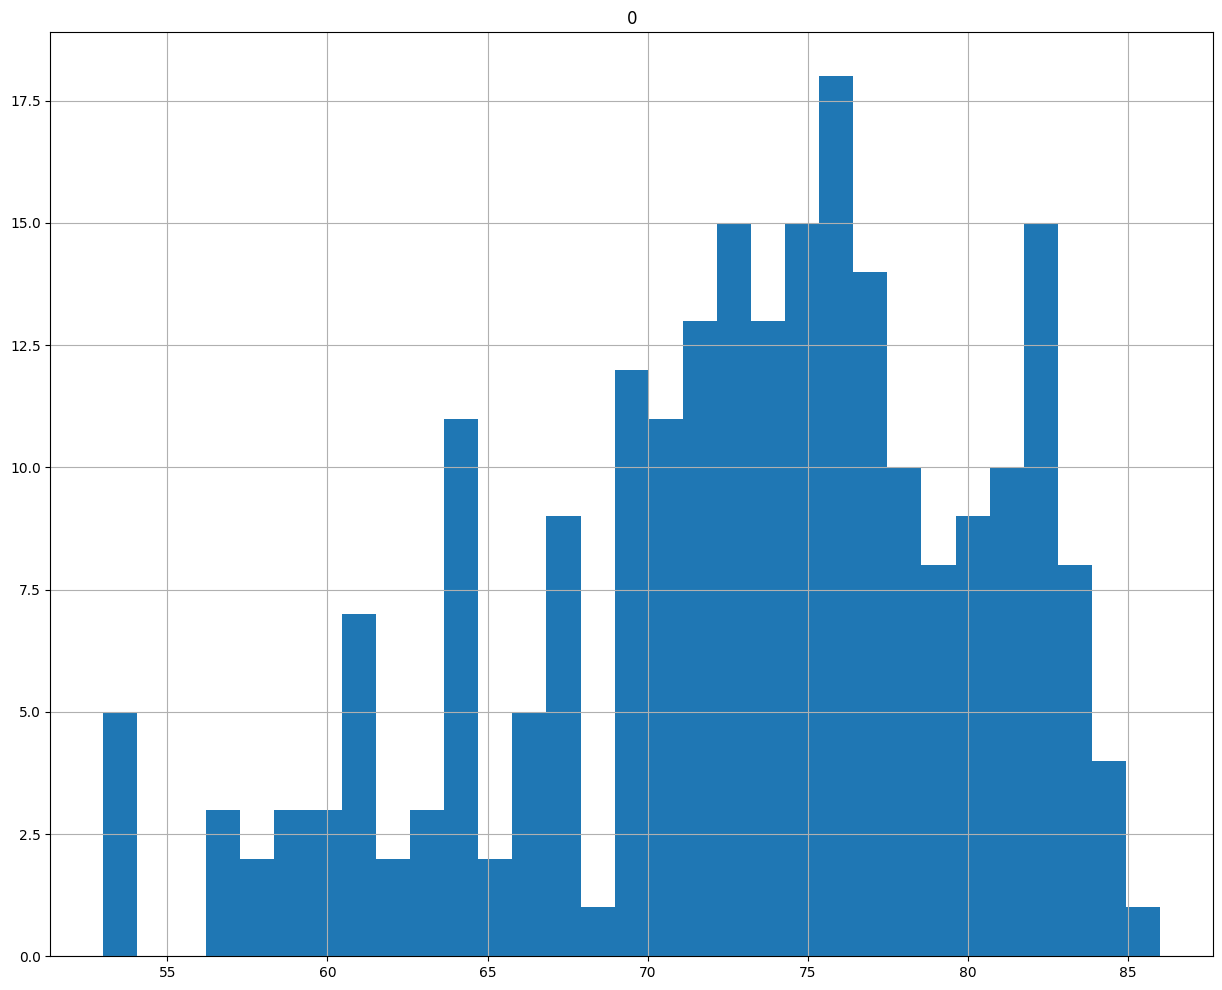

In [255]:
pandas.DataFrame(list((Main_Data['life_expectancy'].apply(lambda x:int(x))))).hist(bins=len(set(Main_Data['life_expectancy'].apply(lambda x:int(x)))))

## Extras

### Venn Diagrams

In [271]:
Main_Data['continent'].value_counts()

Africa           56
Asia             51
Europe           51
North America    35
Oceania          19
South America    14
Income Based      4
World             2
Name: continent, dtype: int64

In [272]:
Main_Data[Main_Data['continent']=='Income Based']

iso_code        date     continent             location  total_cases  \
143  OWID_LIC  2023-02-12  Income Based           Low income    2284294.0   
146  OWID_HIC  2023-02-12  Income Based          High income  428947809.0   
150  OWID_UMC  2023-02-12  Income Based  Upper middle income  144405197.0   
153  OWID_LMC  2023-02-12  Income Based  Lower middle income   97116843.0   

     new_cases  total_deaths  new_deaths    population  life_expectancy  
143       45.0       47887.0         1.0  7.376049e+08        73.466519  
146    57908.0     2855457.0       257.0  1.250515e+09        73.466519  
150    17172.0     2604768.0        86.0  2.525921e+09        73.466519  
153     1621.0     1345503.0        25.0  3.432097e+09        73.466519

In [266]:
Main_Data

iso_code        date     continent             location  total_cases  \
143  OWID_LIC  2023-02-12  Income Based           Low income    2284294.0   
146  OWID_HIC  2023-02-12  Income Based          High income  428947809.0   
150  OWID_UMC  2023-02-12  Income Based  Upper middle income  144405197.0   
153  OWID_LMC  2023-02-12  Income Based  Lower middle income   97116843.0   

     new_cases  total_deaths  new_deaths    population  life_expectancy  
143       45.0       47887.0         1.0  7.376049e+08        73.466519  
146    57908.0     2855457.0       257.0  1.250515e+09        73.466519  
150    17172.0     2604768.0        86.0  2.525921e+09        73.466519  
153     1621.0     1345503.0        25.0  3.432097e+09        73.466519

### Network Graph

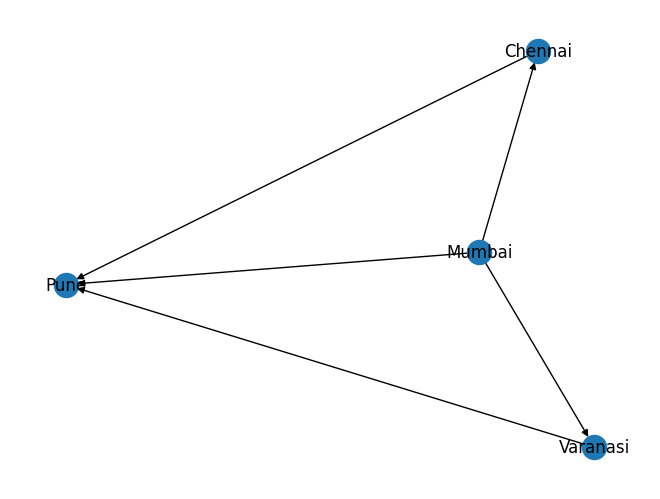

In [18]:
graph = networkx.DiGraph()
graph.add_nodes_from(['Mumbai','Pune',"Chennai","Varanasi"])
graph.add_edge("Mumbai","Pune")
graph.add_edge("Varanasi","Pune")
graph.add_edge("Mumbai","Varanasi")
graph.add_edge("Chennai","Pune")
graph.add_edge("Mumbai","Chennai")
networkx.draw(graph,with_labels=True)
pyplot.draw()
pyplot.show()

### Radar Chart

In [40]:
Radar_Graph_Data=Main_Data[['population','continent',"total_cases","total_deaths"]].groupby("continent").sum()
Radar_Graph_Data['continent']=Main_Data[['population','continent',"total_cases","total_deaths"]].groupby("continent").sum().index

In [41]:
Radar_Graph_Data

population   total_cases  total_deaths continent
continent                                                    
Asia       1.670847e+12  2.984622e+10   373423241.0      Asia

In [42]:
Radar_Graph_Data=Main_Data[['population','date',"new_cases","new_deaths"]]
Radar_Graph_Data['new_cases']=Radar_Graph_Data['new_cases'].apply(lambda x:int(x))
Radar_Graph_Data['date']=Radar_Graph_Data['date'].apply(lambda x:str(x))

In [43]:
Radar_Graph_Data

population        date  new_cases  new_deaths
0     1.417173e+09  2020-01-03          0         0.0
1     1.417173e+09  2020-01-04          0         0.0
2     1.417173e+09  2020-01-05          0         0.0
3     1.417173e+09  2020-01-06          0         0.0
4     1.417173e+09  2020-01-07          0         0.0
...            ...         ...        ...         ...
1174  1.417173e+09  2023-03-22          0         0.0
1175  1.417173e+09  2023-03-23          0         0.0
1176  1.417173e+09  2023-03-24          0         0.0
1177  1.417173e+09  2023-03-25          0         0.0
1178  1.417173e+09  2023-03-26          0         0.0

[1179 rows x 4 columns]

In [44]:
Radar_Graph_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  1179 non-null   float64
 1   date        1179 non-null   object 
 2   new_cases   1179 non-null   int64  
 3   new_deaths  1179 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.0+ KB


In [45]:
Radar_Chart=radar_graph_object.Figure()
Radar_Chart.add_trace(
    radar_graph_object.Scatterpolar(
        r=Radar_Graph_Data['new_deaths'],
        fill='toself',
        name='Poputation'
    )
)
Radar_Chart.add_trace(
    radar_graph_object.Scatterpolar(
        r=Radar_Graph_Data['new_cases'],
        fill='toself',
        name='Poputation'
    )
)


## Tree Maps

<AxesSubplot: >

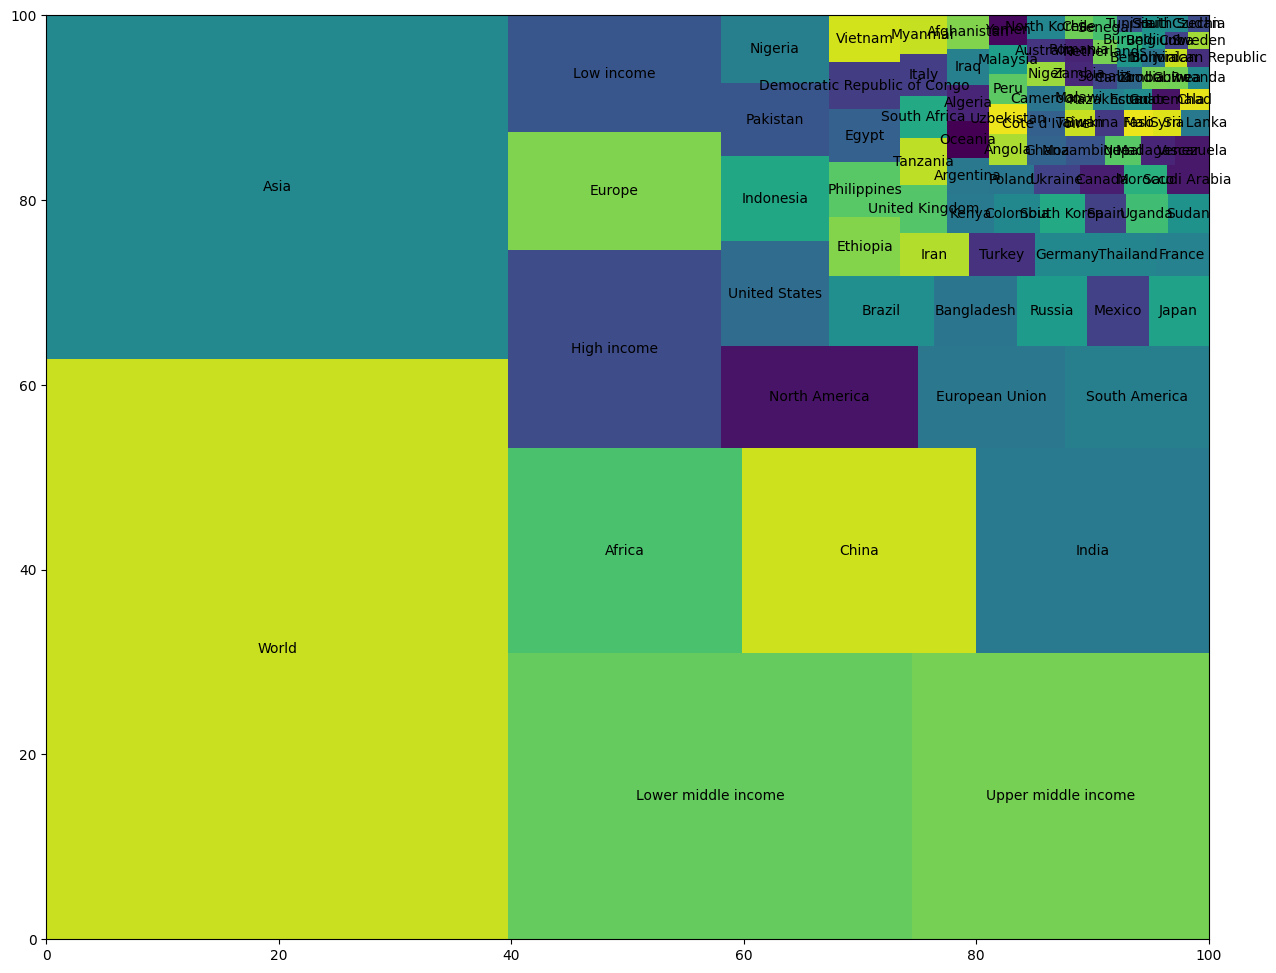

In [285]:
squarify.plot( sizes=Main_Data[['location','population']].sort_values(by='population',ascending=False)['population'][:100],
    label=Main_Data[['location','population']].sort_values(by='population',ascending=False)['location'][:100]
)

<AxesSubplot: >

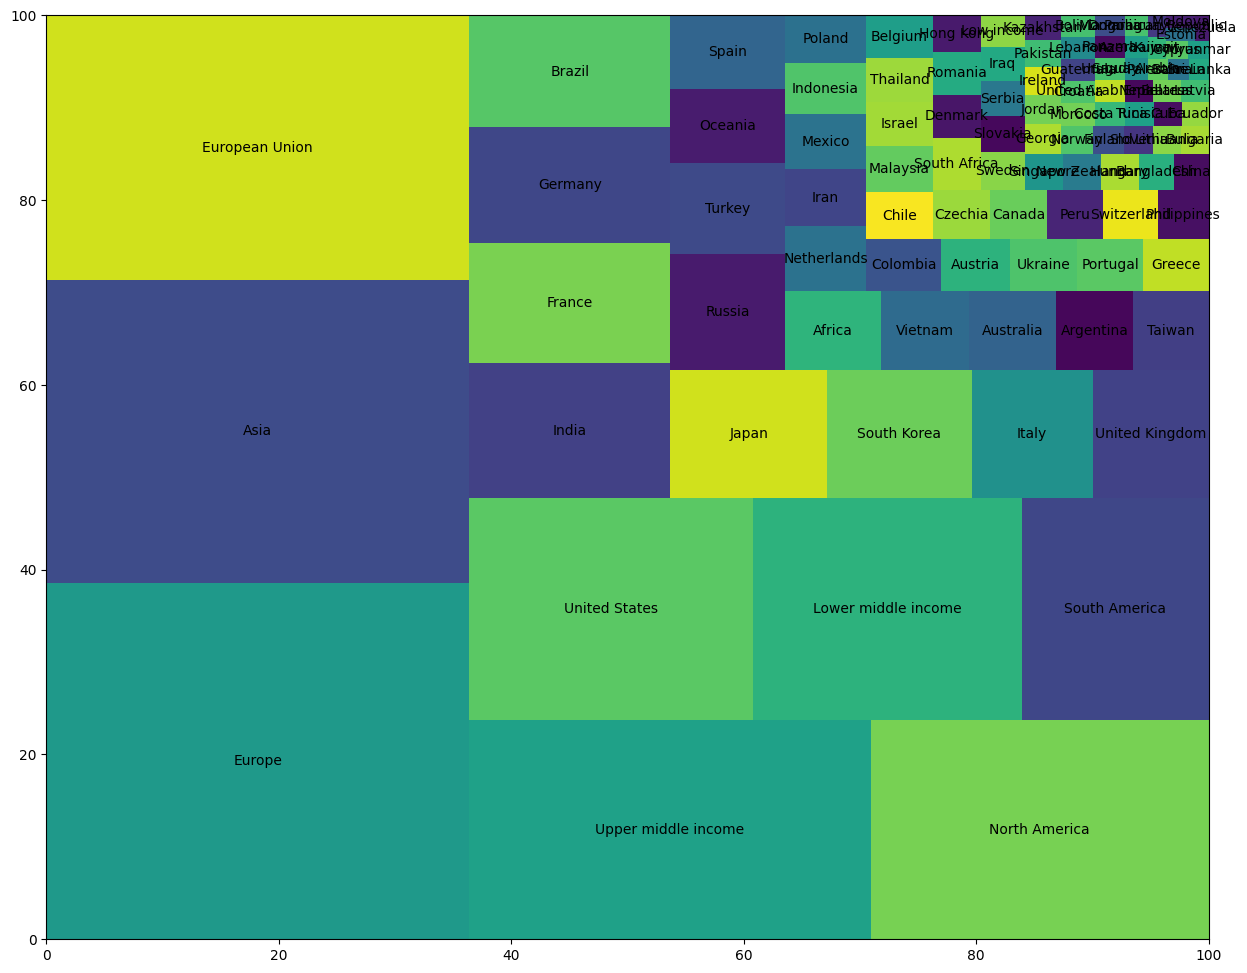

In [287]:
squarify.plot( sizes=Main_Data[['location','total_cases']].sort_values(by='total_cases',ascending=False)['total_cases'][2:100],
    label=Main_Data[['location','total_cases']].sort_values(by='total_cases',ascending=False)['location'][2:100]
)